In [0]:
# !pip uninstall seaborn
# !pip --no-cache-dir install seaborn

In [0]:
#! pip install cryptocmd

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib

# from cryptocmd import CmcScraper
from scipy import stats
import statsmodels.api as sm
from itertools import product
import datetime
from datetime import datetime, date, timedelta
import time
import calendar

# package for creating plots
import matplotlib.pyplot as plt 
import matplotlib as mpl
plt.style.use('seaborn-poster')

# package for making plots with seaborn
import seaborn as sns
color = sns.color_palette()

import plotly
plotly.tools.set_credentials_file(username='zhu.maxwell', api_key='ToIz4azRkvGnZAWDMSE1')

import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

import plotly.offline as offline
offline.init_notebook_mode()

import plotly.tools as tls

# from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
# initialise scraper without passing time interval
# scraper_xrp = CmcScraper('XRP')

# Pandas dataFrame for the same data
# df_xrp = scraper_xrp.get_dataframe()

In [0]:
# df_xrp['dv'] = (df_xrp['Close'] * df_xrp['Volume'] / 1e6)[1:]

In [0]:
# initialise scraper without passing time interval
#scraper_btc = CmcScraper('BTC')

# Pandas dataFrame for the same data
#df_btc = scraper_btc.get_dataframe()
#df_btc.head(3)

In [0]:
# Install scikit learn
#! pip install -U scikit-learn

In [0]:
# Code to authenticate and create the PyDrive client.
!pip install -U -q PyDrive

In [0]:
# Allow authentication of user. Will require access code fromg Google. 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Reading files from my Google Drive
downloaded = drive.CreateFile({'id':'19JnlxaCUyF4TpSqFygXS1oRAJcCJqXvZ'}) # Crypto Market Data
downloaded.GetContentFile('crypto_data.csv')
crypto_df = pd.read_csv('crypto_data.csv')

downloaded2 = drive.CreateFile({'id':'1SRiwBeTaFRB2aWwVoTdelvOC78bGc-D1'}) # Currency Exchange Data
downloaded2.GetContentFile('currency_exchange_rates.csv')
c_ex_rate_df = pd.read_csv('currency_exchange_rates.csv')

downloaded3 = drive.CreateFile({'id':'1p5PQfIpMIjsl4pG5FsE1xZ8OpLQ32mgT'}) # Sentiment
downloaded3.GetContentFile('sentiment.csv')
sentiment_df = pd.read_csv('sentiment.csv')

In [11]:
crypto_df.sample(3)

slug symbol         name        date  ranknow      open  \
268969      maxcoin    MAX      MaxCoin  2014-03-10      652  0.228173   
207614         zoin    ZOI         Zoin  2017-09-10      498  0.072232   
495039  popularcoin    POP  PopularCoin  2017-11-10     1083  0.000013   

            high       low     close    volume     market  close_ratio  spread  
268969  0.229259  0.188792  0.190610  125333.0  1958340.0       0.0449    0.04  
207614  0.072232  0.043955  0.055593    3346.0   967284.0       0.4116    0.03  
495039  0.000014  0.000011  0.000012       2.0    45359.0       0.3333    0.00

In [12]:
sentiment_df.sample(3)

Reported_Date  Bullish  Neutral  Bearish  Total  Bullish_8-week_Mov_Avg  \
435      11/9/1995   0.4900   0.3500   0.1600    1.0                  0.4463   
1495     3/10/2016   0.3736   0.3827   0.2437    1.0                  0.2827   
942       8/4/2005   0.4783   0.2609   0.2609    1.0                  0.4850   

      Bull-Bear_Spread  Bullish_Average  Bullish_Average_=+St. Dev.  \
435              0.330            0.383                       0.484   
1495             0.130            0.383                       0.484   
942              0.217            0.383                       0.484   

      Bullish_Average_=- St. Dev.  S&P500_Weekly_High  S&P500_Weekly_Low  \
435                         0.281              593.90             584.24   
1495                        0.281             2009.13            1968.80   
942                         0.281             1245.86            1233.80   

      S&P500_Weekly_Close  
435                592.72  
1495              1989.26  
942               1245.04

In [0]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Reported_Date'])
sentiment_df['year'] = sentiment_df['Date'].dt.year

In [0]:
c_ex_rate_df['Date'] = pd.to_datetime(c_ex_rate_df['Date'])
c_ex_rate_df['year'] = c_ex_rate_df['Date'].dt.year

In [15]:
c_ex_rate_df.sample(5)

Date  Algerian Dinar  Australian Dollar  Bahrain Dinar  \
3775 2009-07-21             NaN             0.8133          0.376   
5464 2016-04-14        108.8833             0.7656          0.376   
3571 2008-10-06             NaN                NaN          0.376   
2382 2004-03-09             NaN             0.7639          0.376   
5069 2014-09-12         80.9207             0.9060          0.376   

      Bolivar Fuerte  Botswana Pula  Brazilian Real  Brunei Dollar  \
3775          2.1446            NaN             NaN         1.4426   
5464          9.9750        0.09280          3.5423         1.3627   
3571          2.1446        0.13860          2.0532         1.4581   
2382             NaN        0.20725          2.8744         1.7009   
5069          6.2842        0.11010          2.2880         1.2648   

      Canadian Dollar  Chilean Peso  ...   Sri Lanka Rupee  Swedish Krona  \
3775           1.1078        531.33  ...          114.9103         7.7125   
5464           1.2836        670.80  ...               NaN         8.1796   
3571           1.1027        568.35  ...          107.9979         7.1850   
2382           1.3190        593.47  ...           96.7420         7.3650   
5069           1.1076        590.14  ...          130.2717         7.1401   

      Swiss Franc  Thai Baht  Trinidad And Tobago Dollar  Tunisian Dinar  \
3775       1.0687     34.033                      6.2998             NaN   
5464       0.9655        NaN                      6.5971         2.01046   
3571       1.1425     34.187                         NaN             NaN   
2382       1.2785     39.335                      6.2617             NaN   
5069       0.9350     32.216                      6.3546         1.76523   

      U.A.E. Dirham  U.K. Pound Sterling  U.S. Dollar  year  
3775         3.6725               1.6404          1.0  2009  
5464         3.6725               1.4140          1.0  2016  
3571         3.6725               1.7572          1.0  2008  
2382         3.6725               1.8404          1.0  2004  
5069         3.6725               1.6240          1.0  2014  

[5 rows x 53 columns]

In [0]:
crypto_df['date'] = pd.to_datetime(crypto_df['date'])
crypto_df['Date'] = crypto_df['date']
crypto_df['year'] = crypto_df['date'].dt.year

In [17]:
crypto_df.sample(3)

slug symbol        name       date  ranknow      open      high  \
256924     atbcoin    ATB     ATBCoin 2018-01-22      624  0.818853  0.862999   
347375  condensate   RAIN  Condensate 2017-12-06      811  0.018215  0.018738   
171398   boolberry    BBR   Boolberry 2015-07-07      407  0.019244  0.021735   

             low     close     volume      market  close_ratio  spread  \
256924  0.659352  0.760621  3804330.0  33129400.0       0.4973     0.2   
347375  0.013850  0.015934    15305.0   1554760.0       0.4264     0.0   
171398  0.018550  0.019148      152.0     86448.0       0.1878     0.0   

             Date  year  
256924 2018-01-22  2018  
347375 2017-12-06  2017  
171398 2015-07-07  2015

In [18]:
sentiment_df.sample(3)

Reported_Date  Bullish  Neutral  Bearish  Total  Bullish_8-week_Mov_Avg  \
180    12/21/1990    0.160    0.340    0.500    1.0                  0.2038   
895      9/9/2004    0.505    0.257    0.238    1.0                  0.3846   
738      9/6/2001    0.303    0.360    0.337    1.0                  0.3531   

     Bull-Bear_Spread  Bullish_Average  Bullish_Average_=+St. Dev.  \
180            -0.340            0.383                       0.484   
895             0.267            0.383                       0.484   
738            -0.034            0.383                       0.484   

     Bullish_Average_=- St. Dev.  S&P500_Weekly_High  S&P500_Weekly_Low  \
180                        0.281              331.75             326.02   
895                        0.281             1124.08            1113.63   
738                        0.281             1155.40            1082.12   

     S&P500_Weekly_Close       Date  year  
180               331.75 1990-12-21  1990  
895              1121.30 2004-09-09  2004  
738              1085.78 2001-09-06  2001

In [19]:
crypto_df.sample(2)

slug symbol      name       date  ranknow      open      high  \
702082  coinmeet   MEET  CoinMeet 2018-03-29     1380  0.050979  0.060369   
465092   goodomy   GOOD   Goodomy 2018-05-30     1044  0.006383  0.007948   

             low     close      volume     market  close_ratio  spread  \
702082  0.045262  0.045927  22377300.0  9937410.0       0.0440    0.02   
465092  0.006292  0.007942      1212.0  3960670.0       0.9964    0.00   

             Date  year  
702082 2018-03-29  2018  
465092 2018-05-30  2018

In [0]:
crypto_senti_df = pd.merge(crypto_df, sentiment_df, on=['Date'])

In [21]:
crypto_senti_df.sample(5)

slug symbol          name       date  ranknow      open  \
41886     elcoin-el     EL        Elcoin 2016-12-29     1096  0.005455   
13414    smileycoin   SMLY    SmileyCoin 2015-06-04      832  0.000002   
72092         karbo    KRB         Karbo 2017-11-09      710  0.482362   
43536          ubiq    UBQ          Ubiq 2017-01-26      186  0.234249   
6832   donationcoin    DON  Donationcoin 2014-11-13     1567  0.000020   

           high       low     close   volume   ...    Total  \
41886  0.009917  0.005439  0.006640     58.0   ...      1.0   
13414  0.000002  0.000002  0.000002      2.0   ...      1.0   
72092  0.502058  0.464854  0.498090  78041.0   ...      1.0   
43536  0.258679  0.221840  0.257905  23746.0   ...      1.0   
6832   0.000021  0.000016  0.000017      1.0   ...      1.0   

       Bullish_8-week_Mov_Avg  Bull-Bear_Spread Bullish_Average  \
41886                  0.4465             0.198           0.383   
13414                  0.2847             0.027           0.383   
72092                  0.3957             0.220           0.383   
43536                  0.4205            -0.019           0.383   
6832                   0.4618             0.386           0.383   

       Bullish_Average_=+St. Dev. Bullish_Average_=- St. Dev.  \
41886                       0.484                       0.281   
13414                       0.484                       0.281   
72092                       0.484                       0.281   
43536                       0.484                       0.281   
6832                        0.484                       0.281   

       S&P500_Weekly_High  S&P500_Weekly_Low  S&P500_Weekly_Close  year_y  
41886             2273.82            2249.11              2249.92    2016  
13414             2126.22            2099.14              2114.07    2015  
72092             2597.02            2566.17              2594.38    2017  
43536             2299.55            2257.02              2298.37    2017  
6832              2041.28            2001.01              2038.25    2014  

[5 rows x 29 columns]

In [66]:
crypto_senti_df.columns

Index([u'slug', u'symbol', u'name', u'date', u'ranknow', u'open', u'high',
       u'low', u'close', u'volume', u'market', u'close_ratio', u'spread',
       u'Date', u'year_x', u'Reported_Date', u'Bullish', u'Neutral',
       u'Bearish', u'Total', u'Bullish_8-week_Mov_Avg', u'Bull-Bear_Spread',
       u'Bullish_Average', u'Bullish_Average_=+St. Dev.',
       u'Bullish_Average_=- St. Dev.', u'S&P500_Weekly_High',
       u'S&P500_Weekly_Low', u'S&P500_Weekly_Close', u'year_y', u'log_ret',
       u'volatility', u'dv', u'lret', u'daily_illiq'],
      dtype='object')

In [22]:
c_ex_rate_df.sample(3)

Date  Algerian Dinar  Australian Dollar  Bahrain Dinar  \
1003 1998-11-16             NaN             0.6378          0.376   
3214 2007-05-22             NaN             0.8217          0.376   
2657 2005-03-30             NaN             0.7733          0.376   

      Bolivar Fuerte  Botswana Pula  Brazilian Real  Brunei Dollar  \
1003             NaN        0.22800          1.1907         1.6430   
3214             NaN        0.16270             NaN         1.5313   
2657             NaN        0.21615          2.7023         1.6518   

      Canadian Dollar  Chilean Peso  ...   Sri Lanka Rupee  Swedish Krona  \
1003           1.5533           NaN  ...           66.8970            NaN   
3214           1.0855        521.94  ...          110.8591         6.8475   
2657           1.2165        587.29  ...           99.4235         7.0475   

      Swiss Franc  Thai Baht  Trinidad And Tobago Dollar  Tunisian Dinar  \
1003       1.3741        NaN                      6.2852             NaN   
3214       1.2324     34.591                      6.2475             NaN   
2657       1.1992     39.368                         NaN             NaN   

      U.A.E. Dirham  U.K. Pound Sterling  U.S. Dollar  year  
1003         3.6725               1.6733          1.0  1998  
3214         3.6725               1.9719          1.0  2007  
2657         3.6725               1.8804          1.0  2005  

[3 rows x 53 columns]

In [0]:
# Provide the log returns using the price of various currencies in the dataframe and use the value to provide a volatility 
# (rolling standard deviation function). 
# We're using a window of 252 trading days based on the average provided by the NYSE

# GBP Analysis
c_ex_rate_df['gbp_log_ret'] = np.log(c_ex_rate_df['U.K. Pound Sterling'] / c_ex_rate_df['U.K. Pound Sterling'].shift(1))
c_ex_rate_df['gbp_volatility'] = pd.rolling_std(c_ex_rate_df['gbp_log_ret'], window=252) * np.sqrt(252)
c_ex_rate_df['gbp_volatility'].fillna(0, inplace=True)

# RMB Analysis
c_ex_rate_df['rmb_log_ret'] = np.log(c_ex_rate_df['Chinese Yuan'] / c_ex_rate_df['Chinese Yuan'].shift(1))
c_ex_rate_df['rmb_volatility'] = pd.rolling_std(c_ex_rate_df['rmb_log_ret'], window=252) * np.sqrt(252)
c_ex_rate_df['rmb_volatility'].fillna(0, inplace=True)

# AUD Analysis
c_ex_rate_df['aud_log_ret'] = np.log(c_ex_rate_df['Australian Dollar'] / c_ex_rate_df['Australian Dollar'].shift(1))
c_ex_rate_df['aud_volatility'] = pd.rolling_std(c_ex_rate_df['aud_log_ret'], window=252) * np.sqrt(252)
c_ex_rate_df['aud_volatility'].fillna(0, inplace=True)

# INR Analysis
c_ex_rate_df['inr_log_ret'] = np.log(c_ex_rate_df['Indian Rupee'] / c_ex_rate_df['Indian Rupee'].shift(1))
c_ex_rate_df['inr_volatility'] = pd.rolling_std(c_ex_rate_df['inr_log_ret'], window=252) * np.sqrt(252)
c_ex_rate_df['inr_volatility'].fillna(0, inplace=True)

In [24]:
c_ex_rate_df.sample(10)

Date  Algerian Dinar  Australian Dollar  Bahrain Dinar  \
2224 2003-07-29             NaN             0.6646          0.376   
1233 1999-10-06             NaN             0.6612          0.376   
5361 2015-11-13        107.5751             0.7135          0.376   
5002 2014-06-09         79.2786                NaN          0.376   
3224 2007-06-05             NaN             0.8354          0.376   
4044 2010-08-06         74.9455             0.9164          0.376   
2554 2004-11-05             NaN             0.7572          0.376   
2836 2005-12-06             NaN             0.7512            NaN   
4867 2013-11-20         80.0340             0.9406          0.376   
5706 2017-04-04        110.2009             0.7576          0.376   

      Bolivar Fuerte  Botswana Pula  Brazilian Real  Brunei Dollar  \
2224             NaN        0.20540          2.8957         1.7521   
1233             NaN        0.21990          1.9517         1.6795   
5361          6.2842        0.09250          3.7996         1.4201   
5002          6.2842        0.11350          2.2445         1.2509   
3224             NaN        0.16090             NaN         1.5309   
4044          2.5935        0.14830          1.7527         1.3523   
2554             NaN        0.21905          2.8203         1.6542   
2836             NaN        0.18240          2.1960            NaN   
4867          6.2842        0.11640          2.2662         1.2435   
5706          9.9750        0.09410          3.1161         1.3968   

      Canadian Dollar  Chilean Peso       ...        U.S. Dollar  year  \
2224           1.3855        699.97       ...                1.0  2003   
1233           1.4695        490.39       ...                1.0  1999   
5361           1.3332        702.51       ...                1.0  2015   
5002           1.0910        549.59       ...                1.0  2014   
3224           1.0606        525.70       ...                1.0  2007   
4044           1.0273        515.66       ...                1.0  2010   
2554           1.1983        601.87       ...                1.0  2004   
2836           1.1562        513.31       ...                1.0  2005   
4867           1.0445        519.22       ...                1.0  2013   
5706           1.3425        658.16       ...                1.0  2017   

      gbp_log_ret  gbp_volatility  rmb_log_ret  rmb_volatility  aud_log_ret  \
2224     0.001971        0.000000     0.000000             0.0     0.003920   
1233     0.001390        0.000000     0.000000             0.0    -0.001209   
5361     0.002368        0.000000     0.000424             0.0    -0.000560   
5002    -0.000238        0.000000    -0.002242             0.0          NaN   
3224     0.003115        0.000000    -0.001242             0.0     0.002517   
4044    -0.002832        0.000000    -0.000782             0.0     0.000546   
2554    -0.001680        0.102782     0.000000             0.0     0.001057   
2836    -0.001557        0.000000    -0.000347             0.0     0.007214   
4867     0.004097        0.000000    -0.000196             0.0     0.002129   
5706    -0.004329        0.000000          NaN             0.0    -0.003426   

      aud_volatility  inr_log_ret  inr_volatility  
2224             0.0    -0.000217             0.0  
1233             0.0    -0.000229             0.0  
5361             0.0          NaN             0.0  
5002             0.0    -0.002309             0.0  
3224             0.0     0.002221             0.0  
4044             0.0    -0.004553             0.0  
2554             0.0    -0.004425             0.0  
2836             0.0    -0.002163             0.0  
4867             0.0     0.005239             0.0  
5706             0.0          NaN             0.0  

[10 rows x 61 columns]

In [25]:
# Calculate the annualized historical volatility of GBP
c_ex_rate_df['gbp_interday returns'] = (c_ex_rate_df['U.K. Pound Sterling'] / c_ex_rate_df['U.K. Pound Sterling'].shift(1))-1
c_ex_rate_df['gbp_interday returns'].std()
gbp_volatility = c_ex_rate_df['gbp_interday returns'].std() * np.sqrt(252)
print gbp_volatility

0.09188459913641737


In [26]:
# Calculate the annualized historical volatility of RMB
c_ex_rate_df['rmb_interday returns'] = (c_ex_rate_df['Chinese Yuan'] / c_ex_rate_df['Chinese Yuan'].shift(1))-1
c_ex_rate_df['rmb_interday returns'].std()
rmb_volatility = c_ex_rate_df['rmb_interday returns'].std() * np.sqrt(252)
print rmb_volatility

0.016268391381607815


In [27]:
# Calculate the annualized historical volatility of AUD
c_ex_rate_df['aud_interday returns'] = (c_ex_rate_df['Australian Dollar'] / c_ex_rate_df['Australian Dollar'].shift(1))-1
c_ex_rate_df['aud_interday returns'].std()
aud_volatility = c_ex_rate_df['aud_interday returns'].std() * np.sqrt(252)
print aud_volatility

0.12055546041065109


In [28]:
# Calculate the annualized historical volatility of INR
c_ex_rate_df['inr_interday returns'] = (c_ex_rate_df['Indian Rupee'] / c_ex_rate_df['Indian Rupee'].shift(1))-1
c_ex_rate_df['inr_interday returns'].std()
inr_volatility = c_ex_rate_df['inr_interday returns'].std() * np.sqrt(252)
print inr_volatility

0.06299628374204785


In [29]:
c_ex_rate_df.sample(3)

Date  Algerian Dinar  Australian Dollar  Bahrain Dinar  \
5327 2015-09-25        106.2935             0.7013          0.376   
79   1995-04-21             NaN             0.7363          0.376   
2183 2003-06-02             NaN             0.6503          0.376   

      Bolivar Fuerte  Botswana Pula  Brazilian Real  Brunei Dollar  \
5327          6.2842        0.09490          4.1949         1.4243   
79               NaN            NaN             NaN            NaN   
2183             NaN        0.19255          2.9648         1.7340   

      Canadian Dollar  Chilean Peso          ...           rmb_log_ret  \
5327           1.3325        705.92          ...             -0.000094   
79             1.3681           NaN          ...                   NaN   
2183           1.3695        714.10          ...              0.000000   

      rmb_volatility  aud_log_ret  aud_volatility  inr_log_ret  \
5327             0.0     0.002141             0.0          NaN   
79               0.0     0.000815             0.0     0.001273   
2183             0.0    -0.002917             0.0     0.002760   

      inr_volatility  gbp_interday returns  rmb_interday returns  \
5327             0.0             -0.003275             -0.000094   
79               0.0             -0.006321                   NaN   
2183             0.0             -0.010682              0.000000   

      aud_interday returns  inr_interday returns  
5327              0.002143                   NaN  
79                0.000816              0.001273  
2183             -0.002913              0.002764  

[3 rows x 65 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed24d03cd0>,
      dtype=object)

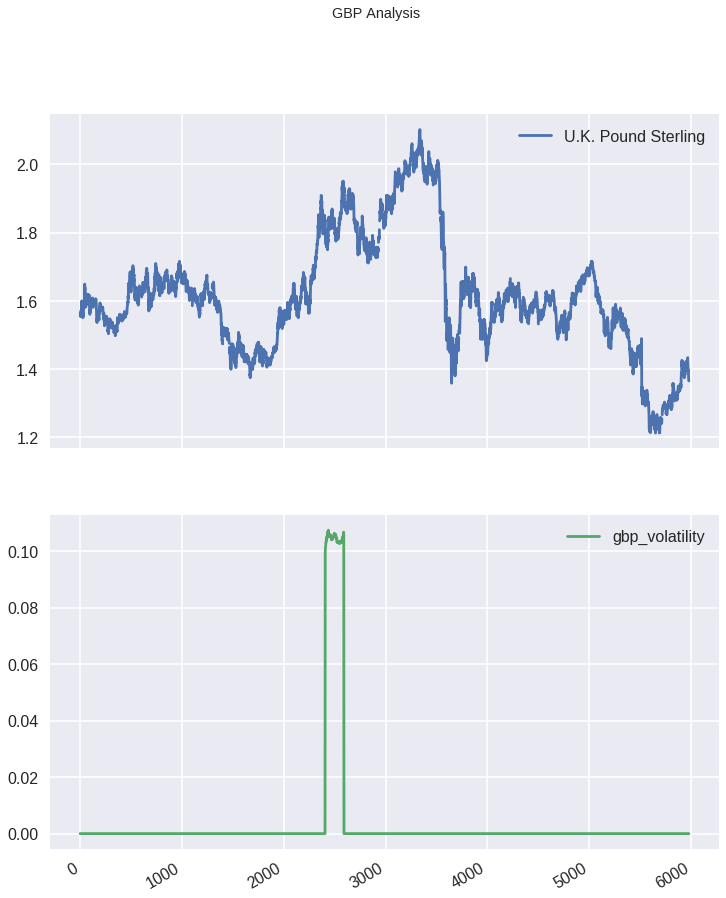

In [30]:
# Plot the GBP close price along with the volatility
c_ex_rate_df[['U.K. Pound Sterling', 'gbp_volatility']].plot(subplots=True, figsize=(12, 15), title= ' GBP Analysis')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed24d7cf50>,
      dtype=object)

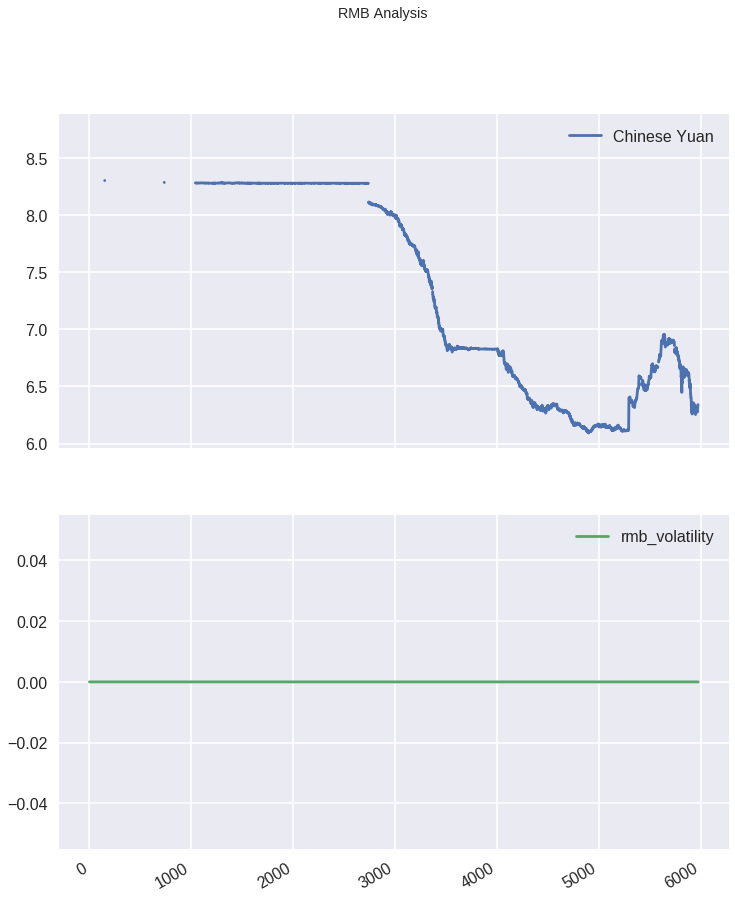

In [31]:
# Plot the RMB close price along with the volatility
c_ex_rate_df[['Chinese Yuan', 'rmb_volatility']].plot(subplots=True, figsize=(12, 15), title= 'RMB Analysis')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed25026a10>,
      dtype=object)

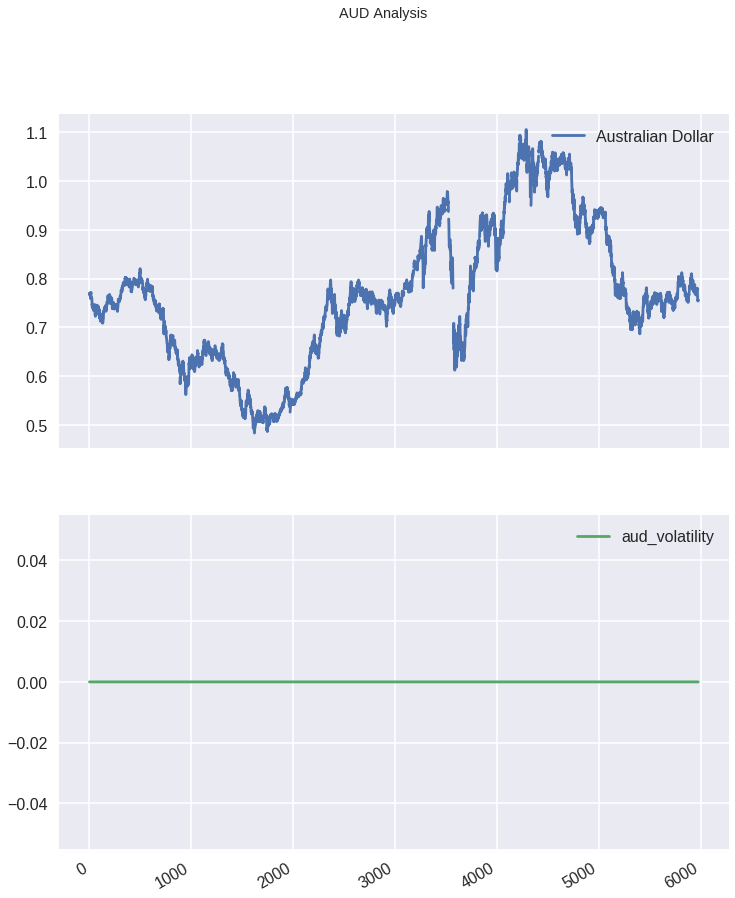

In [32]:
# Plot the AUD close price along with the volatility
c_ex_rate_df[['Australian Dollar', 'aud_volatility']].plot(subplots=True, figsize=(12, 15), title= 'AUD Analysis')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed24ea41d0>,
      dtype=object)

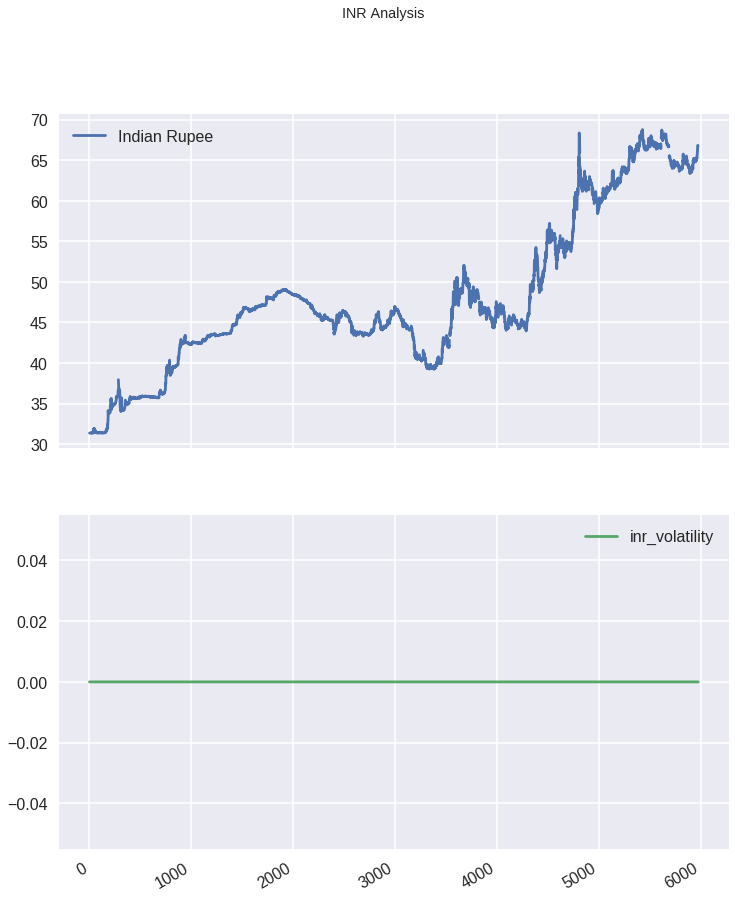

In [33]:
# Plot the INR close price along with the volatility
c_ex_rate_df[['Indian Rupee', 'inr_volatility']].plot(subplots=True, figsize=(12, 15), title= 'INR Analysis')

In [34]:
# Extract the top 4 crypotcurrency data only
criterion = (crypto_df['symbol'] == 'BTC') | (crypto_df['symbol'] == 'XRP') | (crypto_df['symbol'] == 'LTC') | (crypto_df['symbol'] == 'ETH')
top4crypto=crypto_df[criterion]
top4crypto.sample(3)

slug symbol      name       date  ranknow     open        high  \
2191  ethereum    ETH  Ethereum 2016-06-27        2   13.810   14.120000   
3189    ripple    XRP    Ripple 2014-05-19        3    0.006    0.006037   
7049  litecoin    LTC  Litecoin 2018-01-12        6  229.790  243.590000   

             low       close       volume        market  close_ratio  spread  \
2191   13.750000   13.880000   10994700.0  1.124170e+09       0.3514    0.37   
3189    0.005865    0.006034     247907.0  4.690690e+07       0.9826    0.00   
7049  224.820000  236.860000  691160000.0  1.257290e+10       0.6414   18.77   

           Date  year  
2191 2016-06-27  2016  
3189 2014-05-19  2014  
7049 2018-01-12  2018

In [35]:
top4crypto.isnull().any()

slug           False
symbol         False
name           False
date           False
ranknow        False
open           False
high           False
low            False
close          False
volume         False
market         False
close_ratio    False
spread         False
Date           False
year           False
dtype: bool

In [0]:
crypto_senti_df['log_ret'] = crypto_senti_df.groupby('symbol')['close'].apply(lambda x : np.log(x/x.shift(1)))
crypto_senti_df['volatility'] = crypto_senti_df.groupby('symbol')['log_ret'].apply(lambda x : pd.rolling_std(x, window=365) * np.sqrt(365))

In [0]:
#Creating all of the different functions for deriving the data points that we need in our model from the formulas above

def f_log_ret(x):
    return np.log(x / x.shift(1))
# crypto_df['log_ret'] = np.log(crypto_df['close'] / crypto_df['close'].shift(1))

def f_volatility(x):
    return pd.rolling_std(x, window=365) * np.sqrt(365)
# crypto_df['volatility'] = pd.rolling_std(crypto_df['log_ret'], window=365) * np.sqrt(365)
  
def f_dv(x, y):
    return (x * y / 1e6)[1:]
# crypto_df['dv'] = (crypto_df['close'] * crypto_df['volume'] / 1e6)[1:]

def f_lret(x):
    return np.log(x / x.shift(1)).dropna()
# crypto_df['lret'] = np.log(crypto_df['close'] / crypto_df['close'].shift(1)).dropna() 

def f_daily_illiq(x, y):
    return np.abs(x / y)
# crypto_df['daily_illiq'] = np.abs(crypto_df['lret']) / crypto_df['dv']

In [0]:
# It appears the as_index is being ignored so we need to remove the first level of the multiIndex so that we have the original index to work with
log_ret = crypto_senti_df.groupby('symbol', as_index=False).apply(lambda x : f_log_ret(x['close']))
crypto_senti_df['log_ret'] = log_ret.reset_index(level=0, drop=True)

In [0]:
volatility = crypto_senti_df.groupby('symbol', as_index=False).apply(lambda x : f_volatility(x['log_ret']))
crypto_senti_df['volatility'] = volatility.reset_index(level=0, drop=True)

In [0]:
dv = crypto_senti_df.groupby('symbol', as_index=False).apply(lambda x : f_dv(x['close'], x['volume']))
crypto_senti_df['dv'] = dv.reset_index(level=0, drop=True)

In [0]:
lret = crypto_senti_df.groupby('symbol', as_index=False).apply(lambda x : f_lret(x['close']))
crypto_senti_df['lret'] = lret.reset_index(level=0, drop=True)

In [0]:
daily_illiq = crypto_senti_df.groupby('symbol', as_index=False).apply(lambda x : f_daily_illiq(x['lret'], x['dv']))
crypto_senti_df['daily_illiq'] = daily_illiq.reset_index(level=0, drop=True)

In [0]:
crypto_senti_df['volatility'] = pd.rolling_std(crypto_senti_df['log_ret'], window=365) * np.sqrt(365)

In [0]:
BTCcriterion = (crypto_senti_df['symbol'] == 'BTC')
BTCDF=crypto_senti_df[BTCcriterion]


In [0]:
ETHcriterion = (crypto_senti_df['symbol'] == 'ETH')
ETHDF=crypto_senti_df[ETHcriterion]


In [0]:
LTCcriterion = (crypto_senti_df['symbol'] == 'LTC')
LTCDF=crypto_senti_df[LTCcriterion]

In [0]:
XRPcriterion = (crypto_senti_df['symbol'] == 'XRP')
XRPDF=crypto_senti_df[XRPcriterion]

In [55]:
crypto_senti_df.sample(5)

slug symbol        name       date  ranknow          open  \
23863         omni   OMNI        Omni 2016-02-11      442  2.690000e+00   
105287  coffeecoin    CFC  CoffeeCoin 2018-05-03     1610  1.936000e-03   
21230    bunnycoin    BUN   BunnyCoin 2015-12-10      764  3.900000e-08   
68299   zilbercoin    ZBC  Zilbercoin 2017-10-12      861  3.665300e-02   
86703    bitshares    BTS   BitShares 2018-02-08       35  2.141330e-01   

                high           low         close      volume      ...       \
23863   3.150000e+00  2.620000e+00  3.150000e+00      1391.0      ...        
105287  2.420000e-03  1.933000e-03  2.340000e-03       105.0      ...        
21230   5.400000e-08  3.600000e-08  4.200000e-08         3.0      ...        
68299   4.748600e-02  3.492900e-02  4.339900e-02      1223.0      ...        
86703   2.456270e-01  2.141330e-01  2.364170e-01  28156600.0      ...        

        Bullish_Average_=- St. Dev.  S&P500_Weekly_High  S&P500_Weekly_Low  \
23863                         0.281             1935.26            1828.46   
105287                        0.281             2682.87            2612.67   
21230                         0.281             2104.27            2036.53   
68299                         0.281             2555.24            2531.80   
86703                         0.281             2839.26            2593.07   

       S&P500_Weekly_Close  year_y   log_ret  volatility            dv  \
23863              1851.86    2016  0.079249         NaN  4.381650e-03   
105287             2635.67    2018  0.182322         NaN  2.457000e-07   
21230              2047.62    2015  0.074108         NaN  1.260000e-13   
68299              2555.24    2017  0.001822         NaN  5.307698e-05   
86703              2681.66    2018 -0.505453         NaN  6.656699e+00   

            lret   daily_illiq  
23863   0.079249  1.808665e+01  
105287  0.182322  7.420495e+05  
21230   0.074108  5.881585e+11  
68299   0.001822  3.432707e+01  
86703  -0.505453  7.593146e-02  

[5 rows x 34 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed1e0a7550>,
      dtype=object)

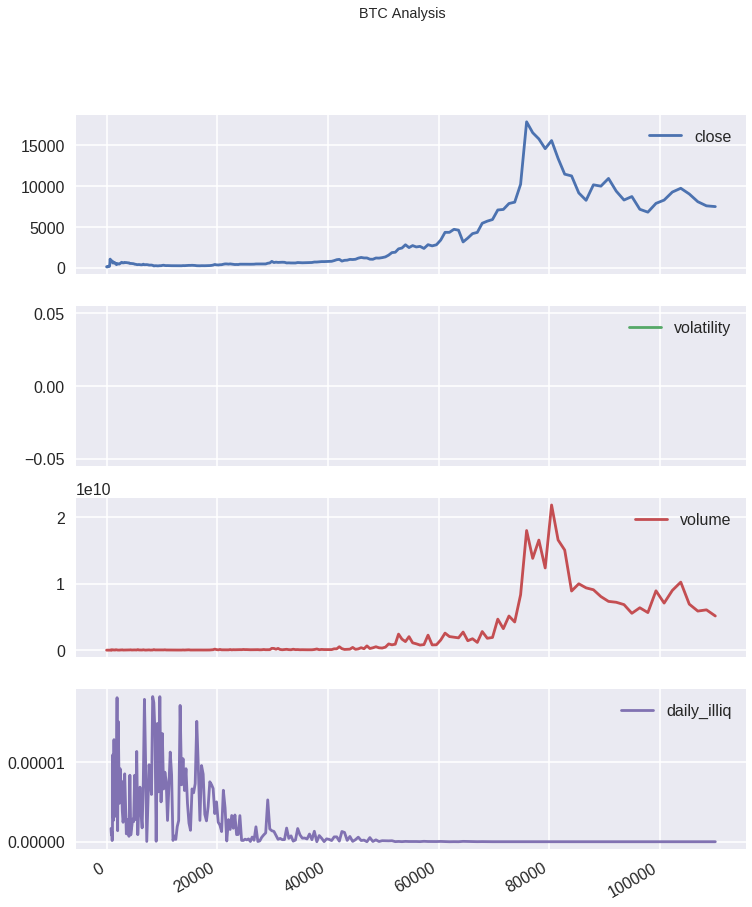

In [60]:
# Creating subplots based on one symbol within the cryptocurrency dataframe
crypto_senti_df.loc[(crypto_senti_df.symbol == 'BTC'), ['close', 'volatility', 'volume', 'daily_illiq']].plot(subplots=True, figsize=(12, 15), title= ' BTC Analysis')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed24d86a10>,
      dtype=object)

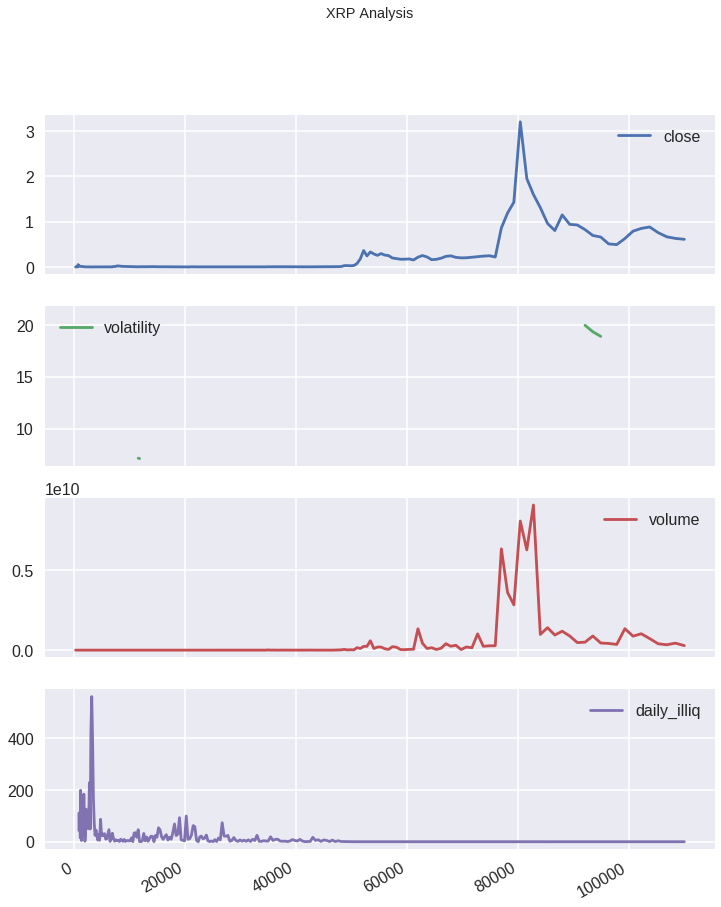

In [58]:
# Creating subplots based on one symbol within the cryptocurrency dataframe
crypto_senti_df.loc[(crypto_senti_df.symbol == 'XRP'), ['close', 'volatility', 'volume', 'daily_illiq']].plot(subplots=True, figsize=(12, 15), title= 'XRP Analysis')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed1ec162d0>,
      dtype=object)

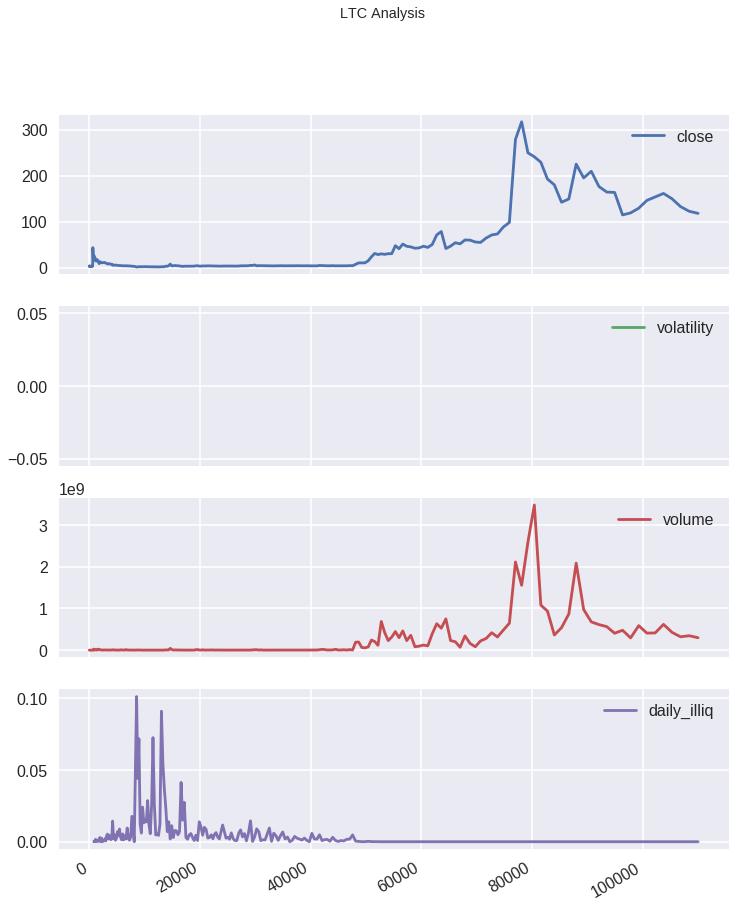

In [46]:
# Creating subplots based on one symbol within the cryptocurrency dataframe
crypto_senti_df.loc[(crypto_senti_df.symbol == 'LTC'), ['close', 'volatility', 'volume', 'daily_illiq']].plot(subplots=True, figsize=(12, 15), title= 'LTC Analysis')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed1e7cb250>,
      dtype=object)

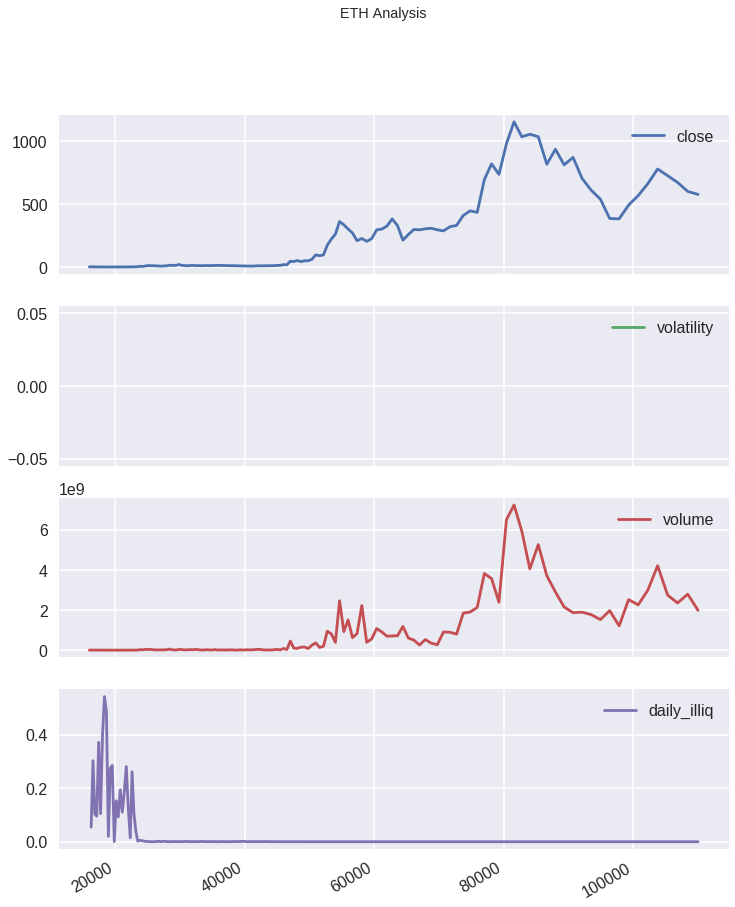

In [47]:
# Creating subplots based on one symbol within the cryptocurrency dataframe
crypto_senti_df.loc[(crypto_senti_df.symbol == 'ETH'), ['close', 'volatility', 'volume', 'daily_illiq']].plot(subplots=True, figsize=(12, 15), title= 'ETH Analysis')

In [48]:
c_ex_rate_df.isnull().any()

Date                          False
Algerian Dinar                 True
Australian Dollar              True
Bahrain Dinar                  True
Bolivar Fuerte                 True
Botswana Pula                  True
Brazilian Real                 True
Brunei Dollar                  True
Canadian Dollar                True
Chilean Peso                   True
Chinese Yuan                   True
Colombian Peso                 True
Czech Koruna                   True
Danish Krone                   True
Euro                           True
Hungarian Forint               True
Icelandic Krona                True
Indian Rupee                   True
Indonesian Rupiah              True
Iranian Rial                   True
Israeli New Sheqel             True
Japanese Yen                   True
Kazakhstani Tenge              True
Korean Won                     True
Kuwaiti Dinar                  True
Libyan Dinar                   True
Malaysian Ringgit              True
Mauritian Rupee             

In [67]:
BTCDF_2013 = BTCDF[BTCDF.year_x == 2013]
BTCDF_2014 = BTCDF[BTCDF.year_x == 2014]
BTCDF_2015 = BTCDF[BTCDF.year_x == 2015]
BTCDF_2016 = BTCDF[BTCDF.year_x == 2016]
BTCDF_2017 = BTCDF[BTCDF.year_x == 2017]
BTCDF_2018 = BTCDF[BTCDF.year_x == 2018]
BTCDF_2013.sample(3)

slug symbol     name       date  ranknow    open    high     low  \
40   bitcoin    BTC  Bitcoin 2013-05-30        1  132.25  132.25  127.00   
536  bitcoin    BTC  Bitcoin 2013-10-31        1  199.83  205.18  198.85   
342  bitcoin    BTC  Bitcoin 2013-09-12        1  135.55  136.08  131.81   

      close  volume     ...       Bullish_Average_=- St. Dev.  \
40   128.80     0.0     ...                             0.281   
536  204.00     0.0     ...                             0.281   
342  133.13     0.0     ...                             0.281   

     S&P500_Weekly_High  S&P500_Weekly_Low S&P500_Weekly_Close  year_y  \
40              1663.52            1636.42             1648.36    2013   
536             1775.22            1740.50             1763.31    2013   
342             1689.13            1633.41             1689.13    2013   

      log_ret  volatility   dv      lret  daily_illiq  
40   0.016439         NaN  0.0  0.016439          inf  
536  0.028692         NaN  0.0  0.028692          inf  
342  0.051637         NaN  0.0  0.051637          inf  

[3 rows x 34 columns]

In [0]:
XRPDF_2013 = XRPDF[XRPDF.year_x == 2013]
XRPDF_2014 = XRPDF[XRPDF.year_x == 2014]
XRPDF_2015 = XRPDF[XRPDF.year_x == 2015]
XRPDF_2016 = XRPDF[XRPDF.year_x == 2016]
XRPDF_2017 = XRPDF[XRPDF.year_x == 2017]
XRPDF_2018 = XRPDF[XRPDF.year_x == 2018]

In [0]:
c_ex_rate_df_2013 = c_ex_rate_df[c_ex_rate_df.year == 2013]
c_ex_rate_df_2014 = c_ex_rate_df[c_ex_rate_df.year == 2014]
c_ex_rate_df_2015 = c_ex_rate_df[c_ex_rate_df.year == 2015]
c_ex_rate_df_2016 = c_ex_rate_df[c_ex_rate_df.year == 2016]
c_ex_rate_df_2017 = c_ex_rate_df[c_ex_rate_df.year == 2017]
c_ex_rate_df_2018 = c_ex_rate_df[c_ex_rate_df.year == 2018]

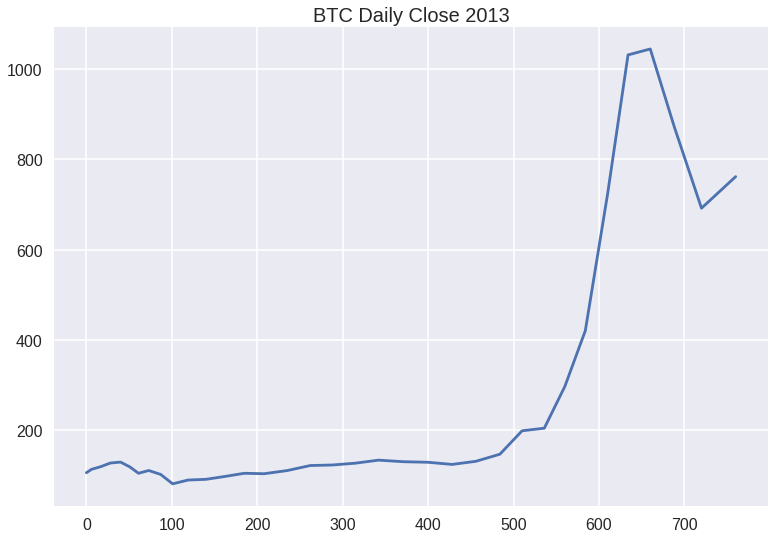

In [71]:
plt.title('BTC Daily Close 2013', fontsize=20)
plt.plot(BTCDF_2013[['close']])
plt.show()

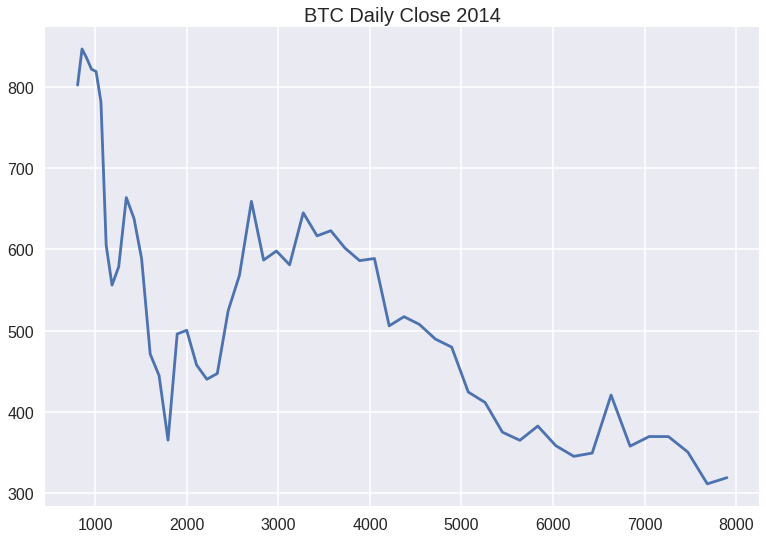

In [72]:
plt.title('BTC Daily Close 2014', fontsize=20)
plt.plot(BTCDF_2014[['close']])
plt.show()

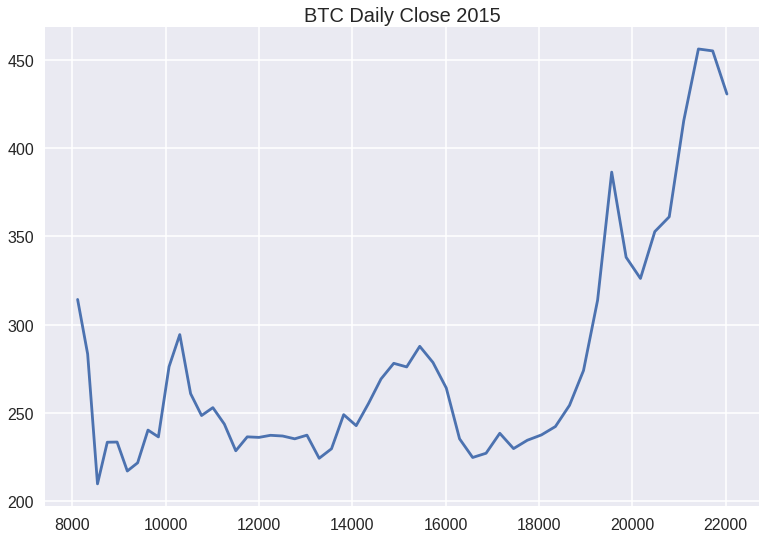

In [73]:
plt.title('BTC Daily Close 2015', fontsize=20)
plt.plot(BTCDF_2015[['close']])
plt.show()

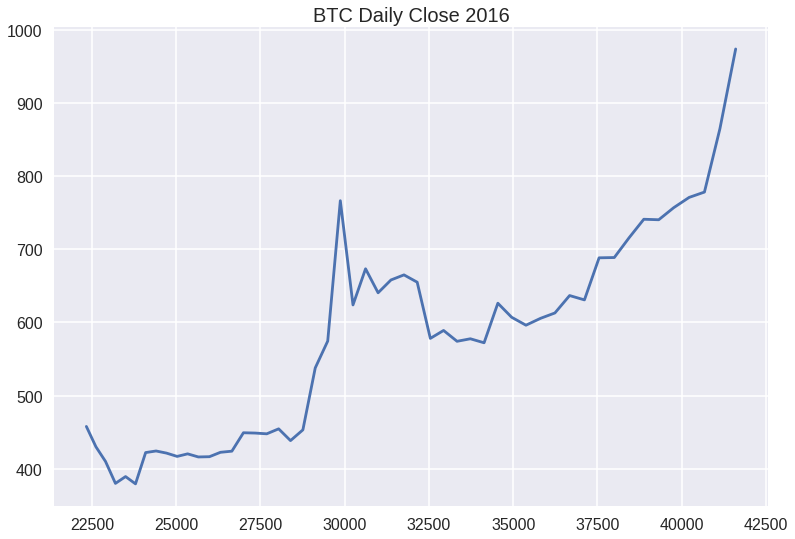

In [74]:
plt.title('BTC Daily Close 2016', fontsize=20)
plt.plot(BTCDF_2016[['close']])
plt.show()

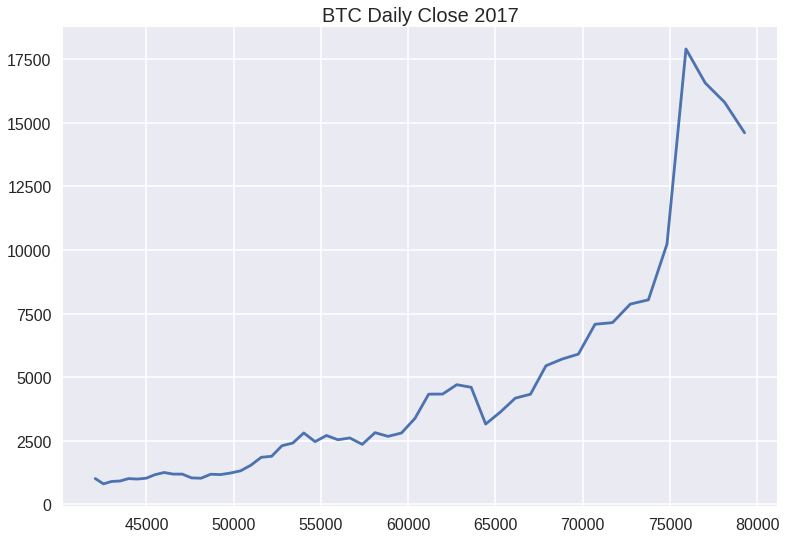

In [75]:
plt.title('BTC Daily Close 2017', fontsize=20)
plt.plot(BTCDF_2017[['close']])
plt.show()

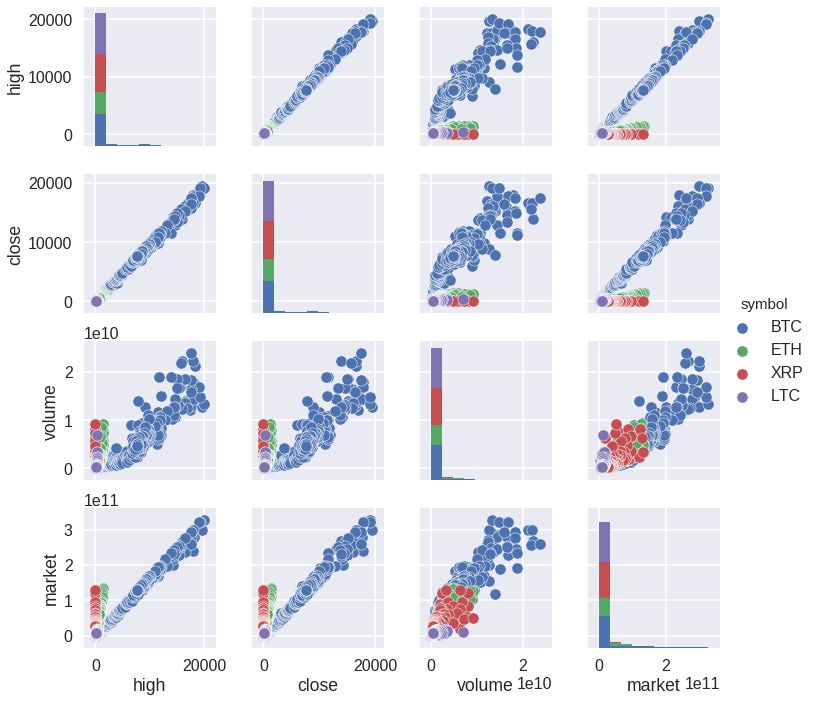

In [76]:
sns.pairplot(top4crypto[['symbol', 'high','close','volume','market']], hue="symbol")

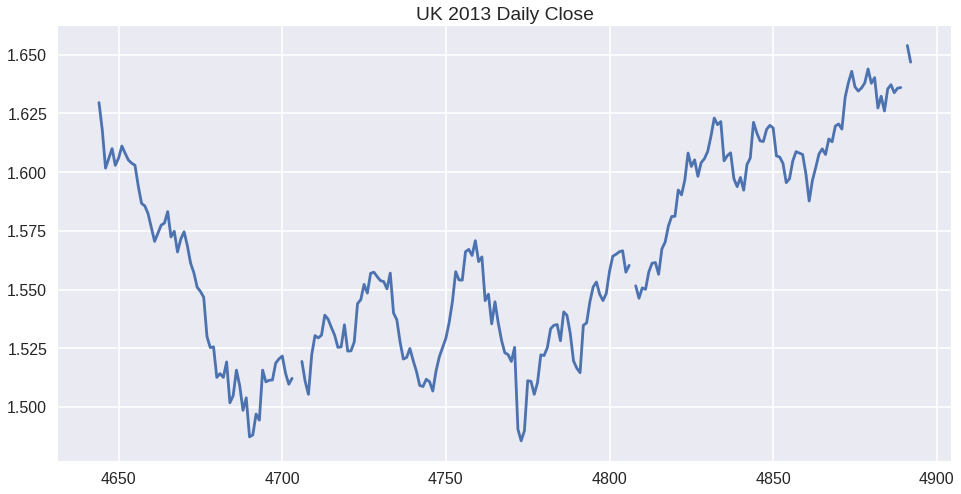

In [77]:
# UK Pound 2013 Daily Close Chart
c_ex_rate_df_2013['U.K. Pound Sterling'].plot(figsize=(16,8), title='UK 2013 Daily Close')

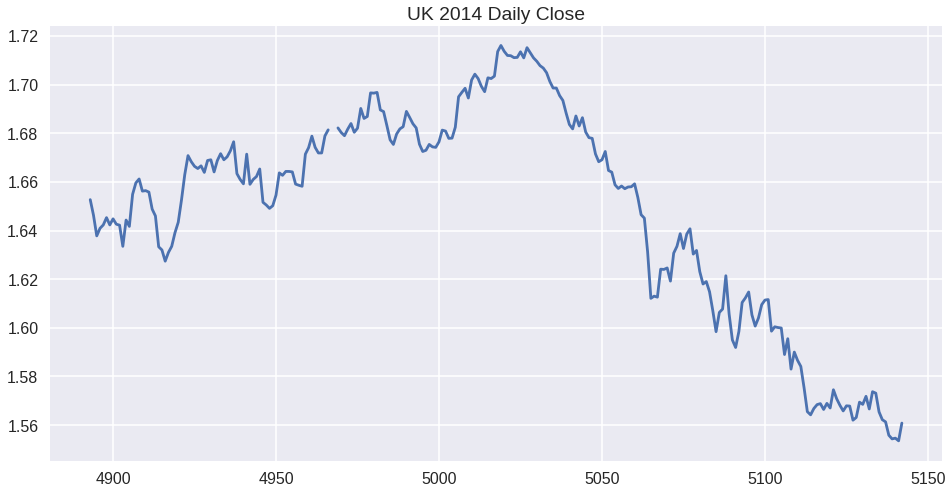

In [78]:
# UK Pound 2014 Daily Close Chart
c_ex_rate_df_2014['U.K. Pound Sterling'].plot(figsize=(16,8), title='UK 2014 Daily Close')

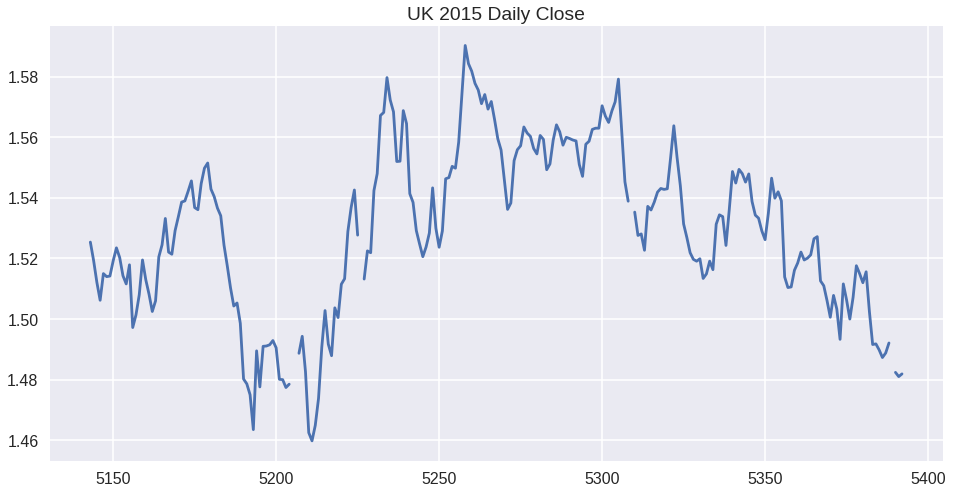

In [79]:
# UK Pound 2015 Daily Close Chart
c_ex_rate_df_2015['U.K. Pound Sterling'].plot(figsize=(16,8), title='UK 2015 Daily Close')

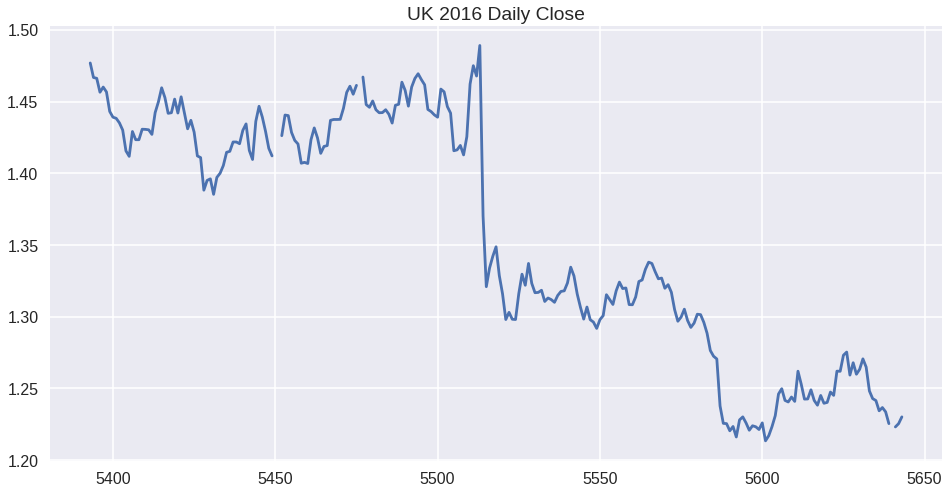

In [80]:
# UK Pound 2016 Daily Close Chart
c_ex_rate_df_2016['U.K. Pound Sterling'].plot(figsize=(16,8), title='UK 2016 Daily Close')

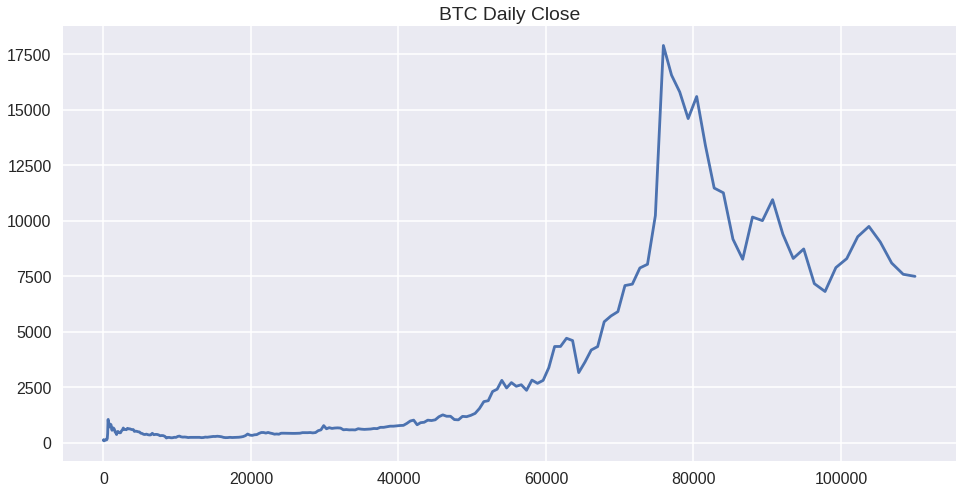

In [81]:
# BTC Daily Close Chart
BTCDF['close'].plot(figsize=(16,8), title='BTC Daily Close')

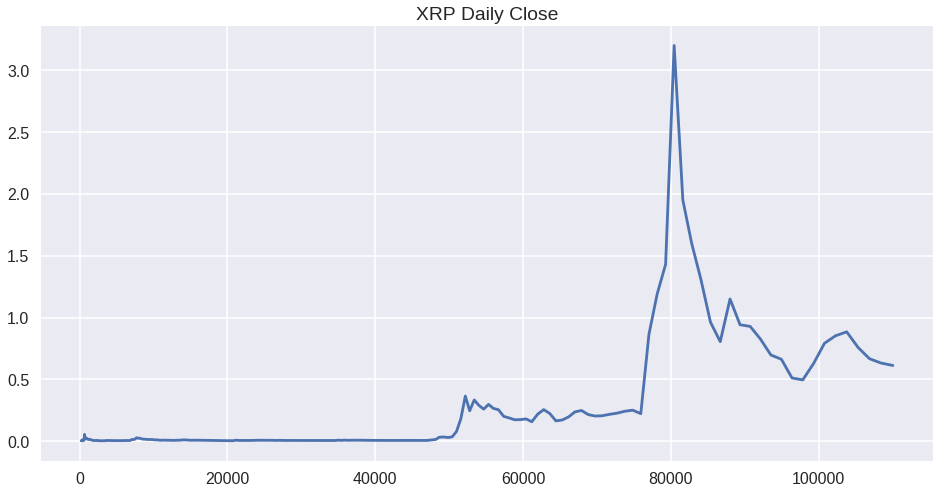

In [82]:
# XRP Daily Close Chart
XRPDF['close'].plot(figsize=(16,8), title='XRP Daily Close')

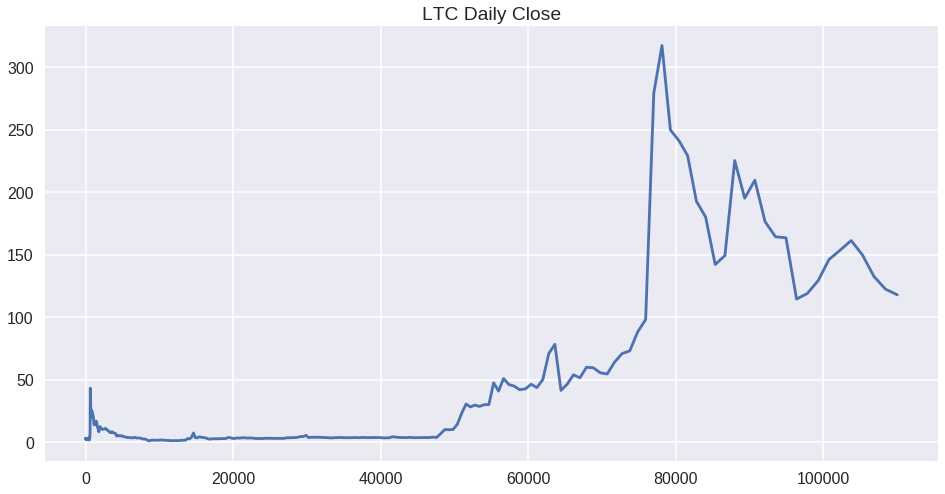

In [83]:
# LTC Daily Close Chart
LTCDF['close'].plot(figsize=(16,8), title='LTC Daily Close')

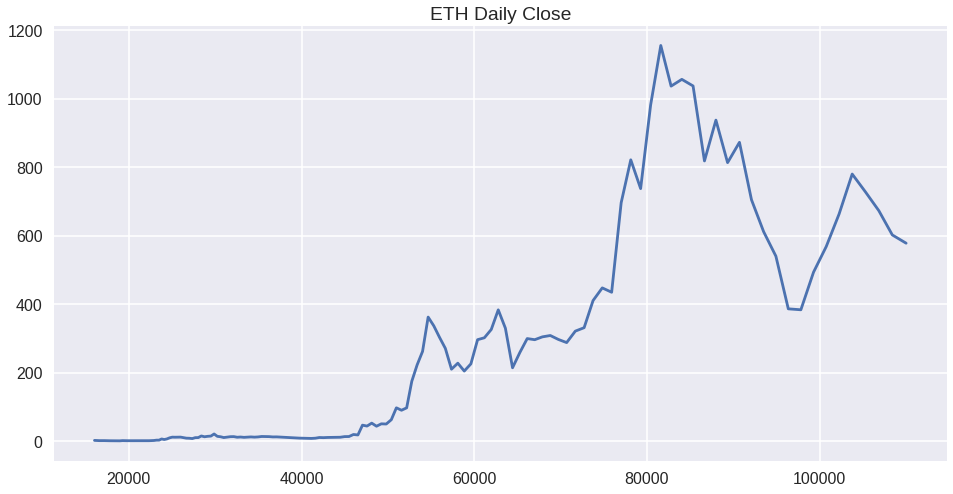

In [84]:
# ETH Daily Close Chart
ETHDF['close'].plot(figsize=(16,8), title='ETH Daily Close')

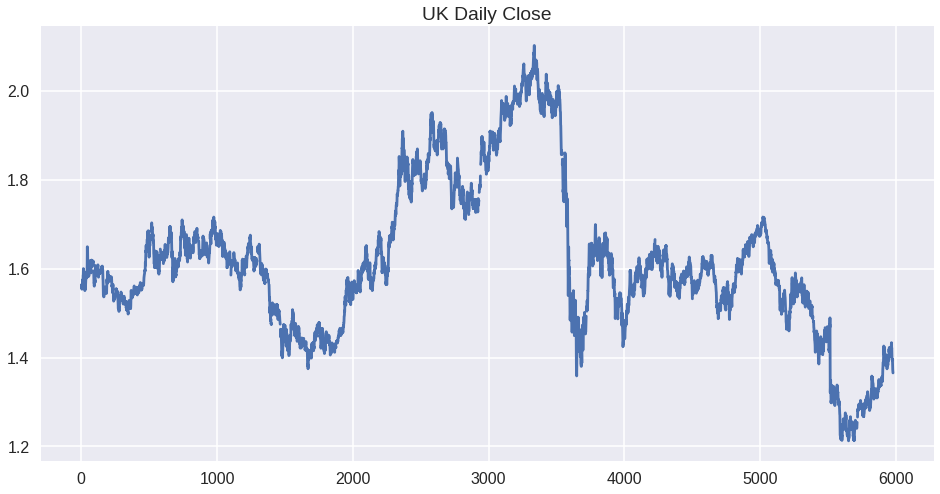

In [85]:
# UK Sterling Pound Daily Close Chart
c_ex_rate_df['U.K. Pound Sterling'].plot(figsize=(16,8), title='UK Daily Close')

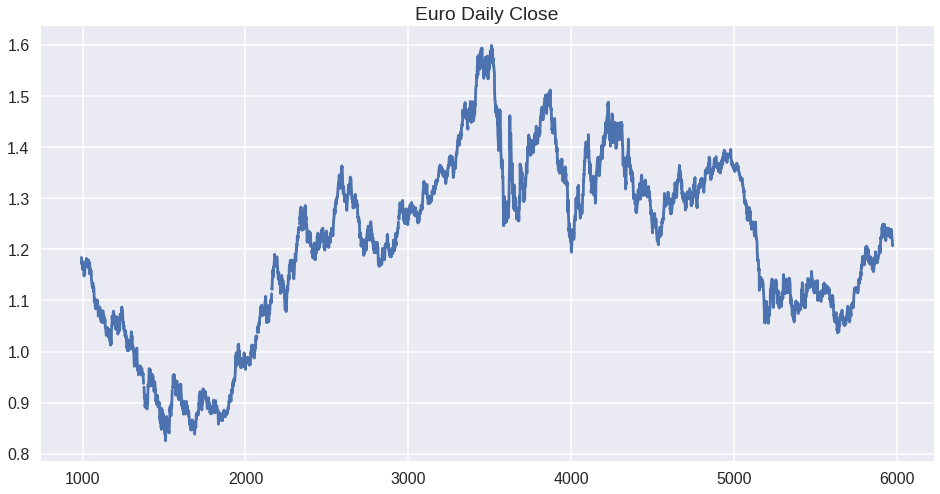

In [86]:
# Euro Daily Close Chart
c_ex_rate_df['Euro'].plot(figsize=(16,8), title='Euro Daily Close')

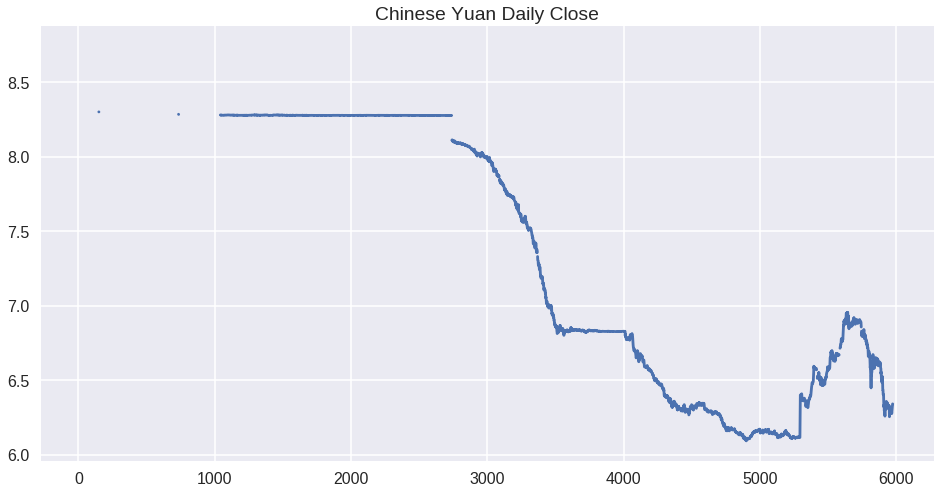

In [87]:
# Chinese Yuan Daily Close Chart
c_ex_rate_df['Chinese Yuan'].plot(figsize=(16,8), title='Chinese Yuan Daily Close')

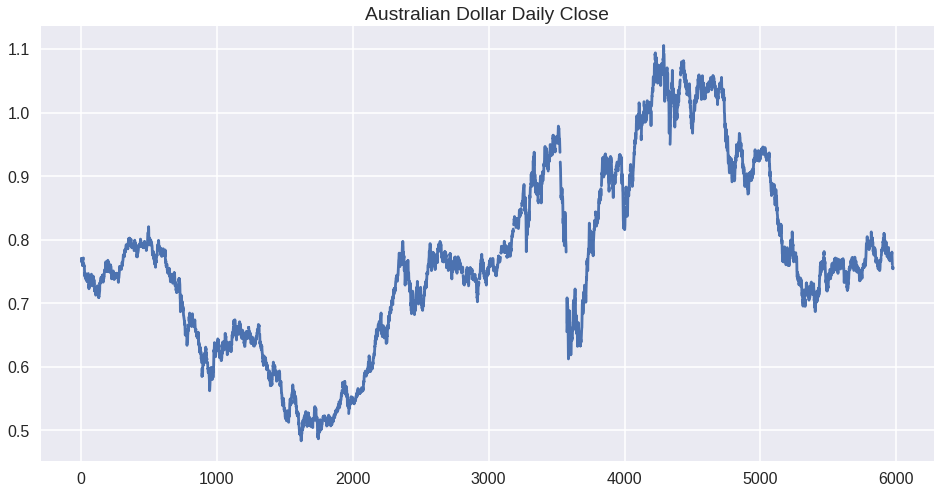

In [88]:
# Australian Dollar  Daily Close Chart
c_ex_rate_df['Australian Dollar'].plot(figsize=(16,8), title='Australian Dollar Daily Close')

**The next section will start our modeling for cryptocurrencies. **

In [0]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

In [90]:
crypto_senti_df.columns

Index([u'slug', u'symbol', u'name', u'date', u'ranknow', u'open', u'high',
       u'low', u'close', u'volume', u'market', u'close_ratio', u'spread',
       u'Date', u'year_x', u'Reported_Date', u'Bullish', u'Neutral',
       u'Bearish', u'Total', u'Bullish_8-week_Mov_Avg', u'Bull-Bear_Spread',
       u'Bullish_Average', u'Bullish_Average_=+St. Dev.',
       u'Bullish_Average_=- St. Dev.', u'S&P500_Weekly_High',
       u'S&P500_Weekly_Low', u'S&P500_Weekly_Close', u'year_y', u'log_ret',
       u'volatility', u'dv', u'lret', u'daily_illiq'],
      dtype='object')

In [91]:
c_ex_rate_df.columns

Index([u'Date', u'Algerian Dinar', u'Australian Dollar', u'Bahrain Dinar',
       u'Bolivar Fuerte', u'Botswana Pula', u'Brazilian Real',
       u'Brunei Dollar', u'Canadian Dollar', u'Chilean Peso', u'Chinese Yuan',
       u'Colombian Peso', u'Czech Koruna', u'Danish Krone', u'Euro',
       u'Hungarian Forint', u'Icelandic Krona', u'Indian Rupee',
       u'Indonesian Rupiah', u'Iranian Rial', u'Israeli New Sheqel',
       u'Japanese Yen', u'Kazakhstani Tenge', u'Korean Won', u'Kuwaiti Dinar',
       u'Libyan Dinar', u'Malaysian Ringgit', u'Mauritian Rupee',
       u'Mexican Peso', u'Nepalese Rupee', u'New Zealand Dollar',
       u'Norwegian Krone', u'Nuevo Sol', u'Pakistani Rupee', u'Peso Uruguayo',
       u'Philippine Peso', u'Polish Zloty', u'Qatar Riyal', u'Rial Omani',
       u'Russian Ruble', u'Saudi Arabian Riyal', u'Singapore Dollar',
       u'South African Rand', u'Sri Lanka Rupee', u'Swedish Krona',
       u'Swiss Franc', u'Thai Baht', u'Trinidad And Tobago Dollar',
       u'

In [0]:
atr_interest = ['symbol', 
                'high']

crypto_df_pred = ['Bullish',
                  'Bearish',
                  'volume', 
                  'close', 
                  'market']

new_predictors = ['ranknow', 
                  'S&P500_Weekly_Close',
                  'Neutral',
                  'low',
                  'spread',
                  'open']

In [0]:
X = crypto_senti_df[crypto_df_pred]

new_X = crypto_senti_df[new_predictors]

In [94]:
print(X.isnull().sum())

Bullish    0
Bearish    0
volume     0
close      0
market     0
dtype: int64


In [95]:
print(new_X.isnull().sum())

ranknow                0
S&P500_Weekly_Close    0
Neutral                0
low                    0
spread                 0
open                   0
dtype: int64


In [96]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
data_with_imputed_values = my_imputer.fit_transform(X)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [0]:
new_data_with_imputed_values = my_imputer.fit_transform(new_X)

In [98]:
type(data_with_imputed_values)

numpy.ndarray

In [99]:
type(new_data_with_imputed_values)

numpy.ndarray

In [100]:
data_with_imputed_values

array([[3.09900e-01, 3.59200e-01, 0.00000e+00, 1.05210e+02, 1.29219e+09],
       [3.09900e-01, 3.59200e-01, 0.00000e+00, 3.37000e+00, 6.52427e+07],
       [3.09900e-01, 3.59200e-01, 0.00000e+00, 2.78807e-01, 6.03898e+06],
       ...,
       [3.50200e-01, 2.63500e-01, 5.91704e+05, 6.70400e-03, 0.00000e+00],
       [3.50200e-01, 2.63500e-01, 1.70000e+01, 6.34000e-04, 0.00000e+00],
       [3.50200e-01, 2.63500e-01, 2.37000e+02, 2.54500e-03, 0.00000e+00]])

In [101]:
new_data_with_imputed_values

array([[1.00000e+00, 1.58270e+03, 3.31000e-01, 9.22800e+01, 3.33200e+01,
        1.16380e+02],
       [6.00000e+00, 1.58270e+03, 3.31000e-01, 3.01000e+00, 1.03000e+00,
        3.78000e+00],
       [2.08000e+02, 1.58270e+03, 3.31000e-01, 2.73770e-01, 6.00000e-02,
        3.21209e-01],
       ...,
       [1.63800e+03, 2.72401e+03, 3.86300e-01, 2.29700e-03, 1.00000e-02,
        3.61900e-03],
       [1.64000e+03, 2.72401e+03, 3.86300e-01, 6.11000e-04, 0.00000e+00,
        6.14000e-04],
       [1.64100e+03, 2.72401e+03, 3.86300e-01, 2.53200e-03, 0.00000e+00,
        2.65800e-03]])

In [0]:
# Parsing first model predictors to DataFrame
X = pd.DataFrame(data=data_with_imputed_values[0:,0:],    # values
             columns=crypto_df_pred)  # 1st row as the column names

In [103]:
print(X.isnull().sum())

Bullish    0
Bearish    0
volume     0
close      0
market     0
dtype: int64


In [0]:
y = crypto_senti_df['open']
y = y.fillna(y.mean())

In [105]:
print(y.isnull().sum())

0


In [106]:
from sklearn.tree import DecisionTreeRegressor

# Define model
crypto_model = DecisionTreeRegressor()

# Fit model
crypto_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [107]:
print("Inputs for predictions for the following 5 cryptocurrencies:")
print(X.head())
print("The predictions are")
print(crypto_model.predict(X.head()))

Inputs for predictions for the following 5 cryptocurrencies:
   Bullish  Bearish  volume       close        market
0   0.3099   0.3592     0.0  105.210000  1.292190e+09
1   0.3099   0.3592     0.0    3.370000  6.524270e+07
2   0.3099   0.3592     0.0    0.278807  6.038980e+06
3   0.3099   0.3592     0.0    1.070000  6.562540e+06
4   0.3099   0.3592     0.0    3.300000  1.005960e+06
The predictions are
[116.38       3.78       0.321209   1.21       3.66    ]


In [0]:
# inserting the first prediction into the dataframe
first_pred = crypto_model.predict(X)
crypto_senti_df['first_pred'] = pd.DataFrame(data = np.c_[first_pred])

In [109]:
crypto_senti_df.sample(3)

slug symbol         name       date  ranknow        open  \
76188     peepcoin    PCN     PeepCoin 2017-12-07      438    0.000107   
72180  wild-crypto   WILD  Wild Crypto 2017-11-09      868    0.071989   
33730      bitcoin    BTC      Bitcoin 2016-08-25        1  580.180000   

             high         low       close       volume     ...      \
76188    0.000145    0.000048    0.000056         53.0     ...       
72180    0.077898    0.058659    0.066711      10462.0     ...       
33730  580.450000  575.170000  577.760000  136130000.0     ...       

       S&P500_Weekly_High  S&P500_Weekly_Low  S&P500_Weekly_Close year_y  \
76188             2665.19            2620.32              2629.27   2017   
72180             2597.02            2566.17              2594.38   2017   
33730             2193.42            2168.50              2175.44   2016   

        log_ret volatility            dv      lret   daily_illiq  first_pred  
76188 -0.369097        NaN  2.968000e-09 -0.369097  1.243590e+08    0.000182  
72180  0.059110        NaN  6.979305e-04  0.059110  8.469311e+01    0.071989  
33730  0.005972        NaN  7.865047e+04  0.005972  7.592867e-08  580.180000  

[3 rows x 35 columns]

In [110]:
new_y = crypto_senti_df['close']
new_y = new_y.fillna(new_y.mean())
new_y.sample(3)

50335     0.004302
85784     7.730000
105447    1.270000
Name: close, dtype: float64

In [111]:
print(new_X.isnull().sum())

ranknow                0
S&P500_Weekly_Close    0
Neutral                0
low                    0
spread                 0
open                   0
dtype: int64


In [112]:
print(new_y.isnull().sum())

0


In [0]:
# Parsing new prediction model to DataFrame
new_X = pd.DataFrame(data=new_data_with_imputed_values[0:,0:],    # values
                     columns=new_predictors)                      # 1st row as the column names

In [114]:
from sklearn.tree import DecisionTreeRegressor

# Define model
new_crypto_model = DecisionTreeRegressor()

# Fit model
new_crypto_model.fit(new_X, new_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [115]:
print("The new predicters for the following 5 cryptocurrencies:")
print(new_X.head())
print("The predictions are")
print(new_crypto_model.predict(new_X.head()))

The new predicters for the following 5 cryptocurrencies:
   ranknow  S&P500_Weekly_Close  Neutral       low  spread        open
0      1.0               1582.7    0.331  92.28000   33.32  116.380000
1      6.0               1582.7    0.331   3.01000    1.03    3.780000
2    208.0               1582.7    0.331   0.27377    0.06    0.321209
3    310.0               1582.7    0.331   0.93610    0.46    1.210000
4    549.0               1582.7    0.331   2.91000    1.05    3.660000
The predictions are
[105.21       3.37       0.278556   1.07       3.3     ]


In [0]:
# inserting the second prediction into the dataframe
second_pred = new_crypto_model.predict(new_X)
crypto_senti_df['second_pred'] = pd.DataFrame(data = np.c_[second_pred])

In [117]:
crypto_senti_df.sample(3)

slug symbol            name       date  ranknow      open  \
85283        landcoin   LDCN        LandCoin 2018-01-25     1573  0.007181   
71554  litecoin-ultra   LTCU  LiteCoin Ultra 2017-11-02     1326  0.008561   
10850        korecoin   KORE            Kore 2015-03-26      640  0.009575   

           high       low     close  volume     ...       S&P500_Weekly_Low  \
85283  0.011016  0.006796  0.010525  3358.0     ...                 2778.38   
71554  0.011247  0.007934  0.010318  1116.0     ...                 2544.00   
10850  0.010362  0.009524  0.009661     8.0     ...                 2061.05   

       S&P500_Weekly_Close  year_y   log_ret  volatility            dv  \
85283              2837.54    2018 -0.454625         NaN  3.534295e-05   
71554              2579.36    2017 -0.561801         NaN  1.151489e-05   
10850              2061.05    2015 -0.794406         NaN  7.728800e-08   

           lret   daily_illiq  first_pred  second_pred  
85283 -0.454625  1.286324e+04    0.007181     0.010525  
71554 -0.561801  4.878910e+04    0.008561     0.010017  
10850 -0.794406  1.027851e+07    0.009166     0.009845  

[3 rows x 36 columns]

In [118]:
# Calculating the mean absolute error to validate which model provides a better result
from sklearn.metrics import mean_absolute_error

pred_open = crypto_model.predict(X)
mean_absolute_error(y, pred_open)

8.730579998417177e-05

In [119]:
new_pred_prices = new_crypto_model.predict(new_X)
mean_absolute_error(new_y, new_pred_prices)

9.428069111248027e-05

In [0]:
# Splitting data into training and validation data or the predictors and the target 
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 0)
train_new_X, test_new_X, train_new_y, test_new_y = train_test_split(new_X, new_y,random_state = 0)

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_model_first = RandomForestRegressor()

In [122]:
forest_model_first.fit(train_X, train_y)
crypto_preds = forest_model_first.predict(test_X)
print(mean_absolute_error(test_y, crypto_preds))

73.4036985396368


In [123]:
print("The new predicters for the following 5 cryptocurrencies:")
print(X.head())
print("The predictions are")
print(forest_model_first.predict(X.head()))

The new predicters for the following 5 cryptocurrencies:
   Bullish  Bearish  volume       close        market
0   0.3099   0.3592     0.0  105.210000  1.292190e+09
1   0.3099   0.3592     0.0    3.370000  6.524270e+07
2   0.3099   0.3592     0.0    0.278807  6.038980e+06
3   0.3099   0.3592     0.0    1.070000  6.562540e+06
4   0.3099   0.3592     0.0    3.300000  1.005960e+06
The predictions are
[115.426       3.695       0.3144953   1.1491285   3.489    ]


In [0]:
# inserting the third prediction into the dataframe
third_pred = forest_model_first.predict(X)
crypto_senti_df['third_pred'] = pd.DataFrame(data = np.c_[third_pred])

In [125]:
forest_model_second = RandomForestRegressor()
forest_model_second.fit(train_new_X, train_new_y)
crypto_new_preds = forest_model_second.predict(test_new_X)
print(mean_absolute_error(test_new_y, crypto_new_preds))

30.935668434478224


In [126]:
print("The new predicters for the following 5 cryptocurrencies:")
print(new_X.head())
print("The predictions are")
print(forest_model_second.predict(new_X.head()))

The new predicters for the following 5 cryptocurrencies:
   ranknow  S&P500_Weekly_Close  Neutral       low  spread        open
0      1.0               1582.7    0.331  92.28000   33.32  116.380000
1      6.0               1582.7    0.331   3.01000    1.03    3.780000
2    208.0               1582.7    0.331   0.27377    0.06    0.321209
3    310.0               1582.7    0.331   0.93610    0.46    1.210000
4    549.0               1582.7    0.331   2.91000    1.05    3.660000
The predictions are
[105.27         3.39         0.27884061   1.1297604    3.296     ]


In [0]:
# inserting the third prediction into the dataframe
fourth_pred = forest_model_second.predict(new_X)
crypto_senti_df['fourth_pred'] = pd.DataFrame(data = np.c_[fourth_pred])

In [128]:
crypto_senti_df.sample(3)

slug symbol                name       date  ranknow  \
27715               nexus    NXS               Nexus 2016-05-05      104   
29793          sativacoin    STV          Sativacoin 2016-06-09     1212   
45042  safe-exchange-coin  SAFEX  Safe Exchange Coin 2017-02-16      229   

           open      high       low     close  volume     ...       year_y  \
27715  0.006058  0.007382  0.006057  0.006406    98.0     ...         2016   
29793  0.001454  0.001456  0.001445  0.001449    52.0     ...         2016   
45042  0.000292  0.000310  0.000292  0.000308   900.0     ...         2017   

        log_ret  volatility            dv      lret   daily_illiq  first_pred  \
27715 -0.119066         NaN  6.277880e-07 -0.119066  1.896591e+05    0.006138   
29793  0.234596         NaN  7.534800e-08  0.234596  3.113501e+06    0.001540   
45042  0.139113         NaN  2.772000e-07  0.139113  5.018499e+05    0.000182   

       second_pred  third_pred  fourth_pred  
27715     0.006305    0.006414     0.006272  
29793     0.001606    0.001461     0.001645  
45042     0.000141    0.000135     0.000151  

[3 rows x 38 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed198476d0>,
      dtype=object)

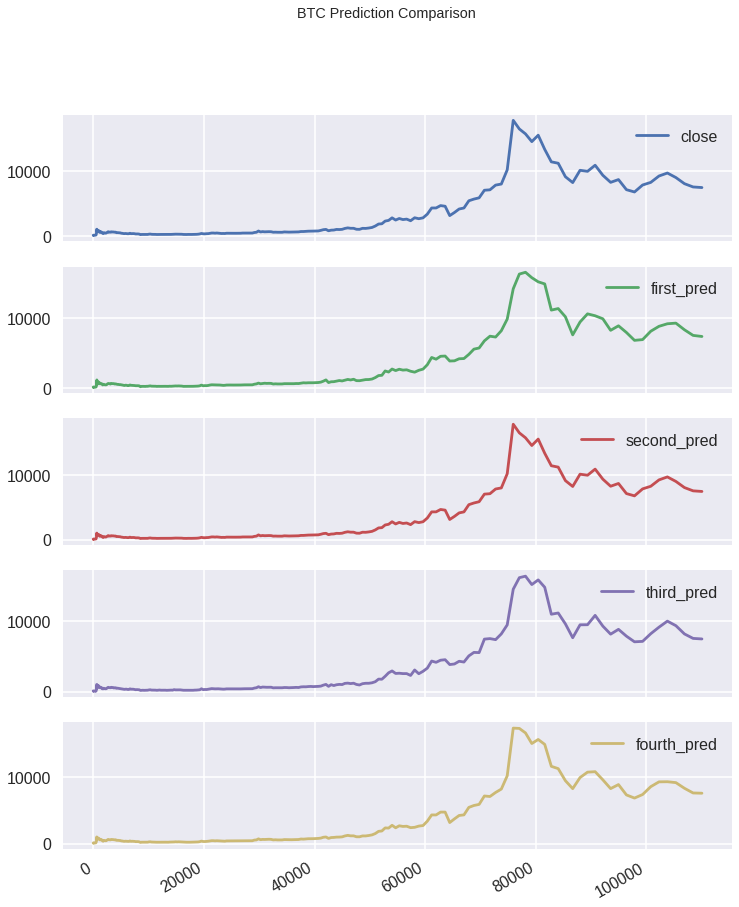

In [129]:
# Creating subplots based on one symbol within the cryptocurrency dataframe
crypto_senti_df.loc[(crypto_senti_df.symbol == 'BTC'), ['close', 'first_pred', 'second_pred', 'third_pred', 'fourth_pred']].plot(subplots=True, figsize=(12, 15), title= 'BTC Prediction Comparison')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed19620e10>,
      dtype=object)

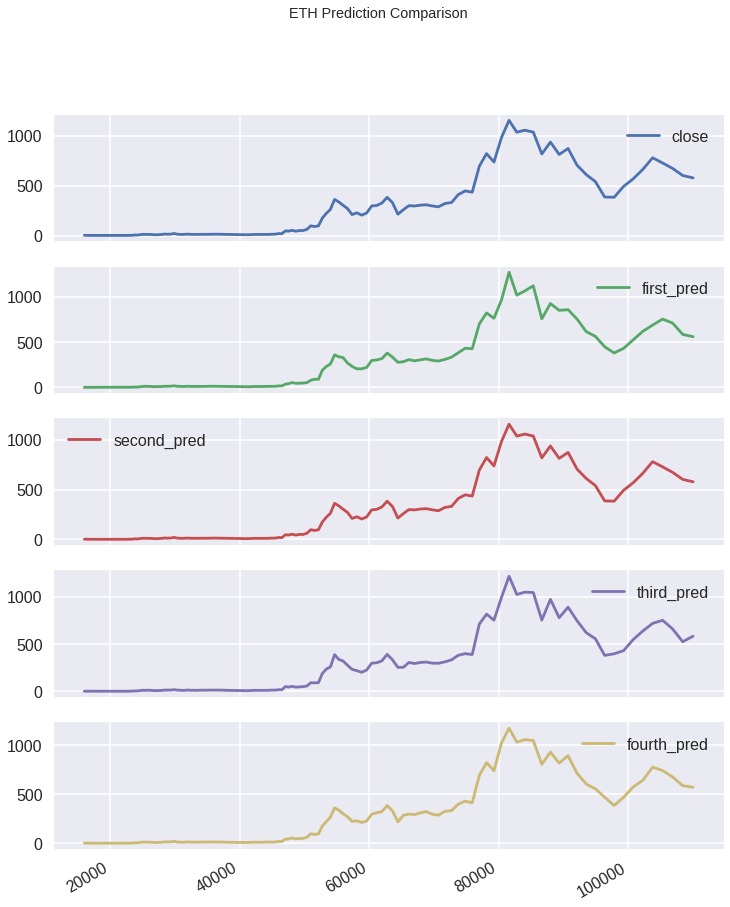

In [130]:
# Creating subplots based on one symbol within the cryptocurrency dataframe
crypto_senti_df.loc[(crypto_senti_df.symbol == 'ETH'), ['close', 'first_pred', 'second_pred', 'third_pred', 'fourth_pred']].plot(subplots=True, figsize=(12, 15), title= 'ETH Prediction Comparison')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed19365fd0>,
      dtype=object)

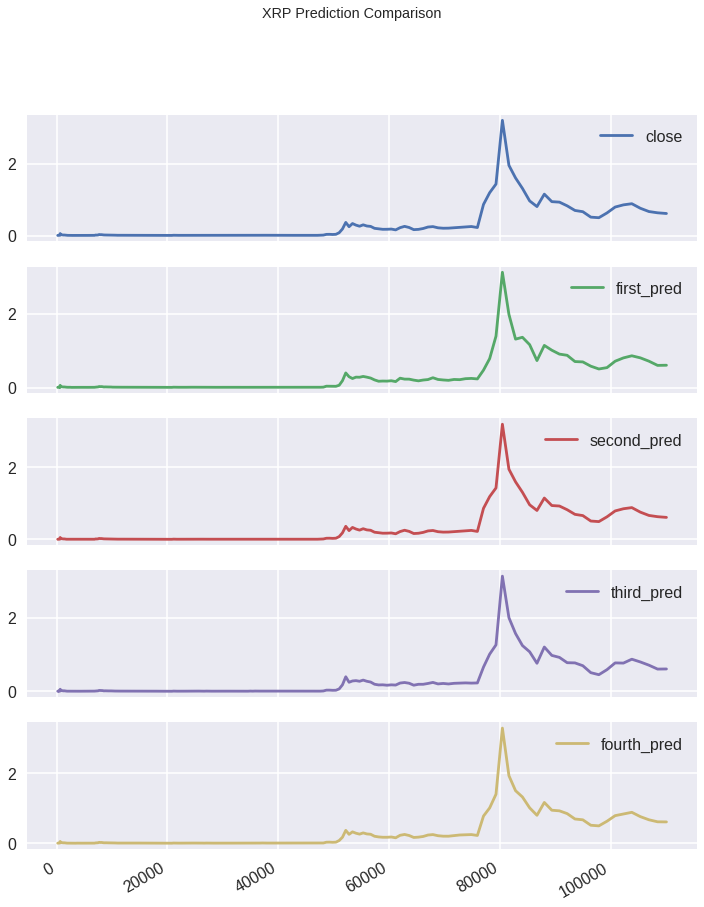

In [131]:
# Creating subplots based on one symbol within the cryptocurrency dataframe
crypto_senti_df.loc[(crypto_senti_df.symbol == 'XRP'), ['close', 'first_pred', 'second_pred', 'third_pred', 'fourth_pred']].plot(subplots=True, figsize=(12, 15), title= 'XRP Prediction Comparison')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed19080ed0>,
      dtype=object)

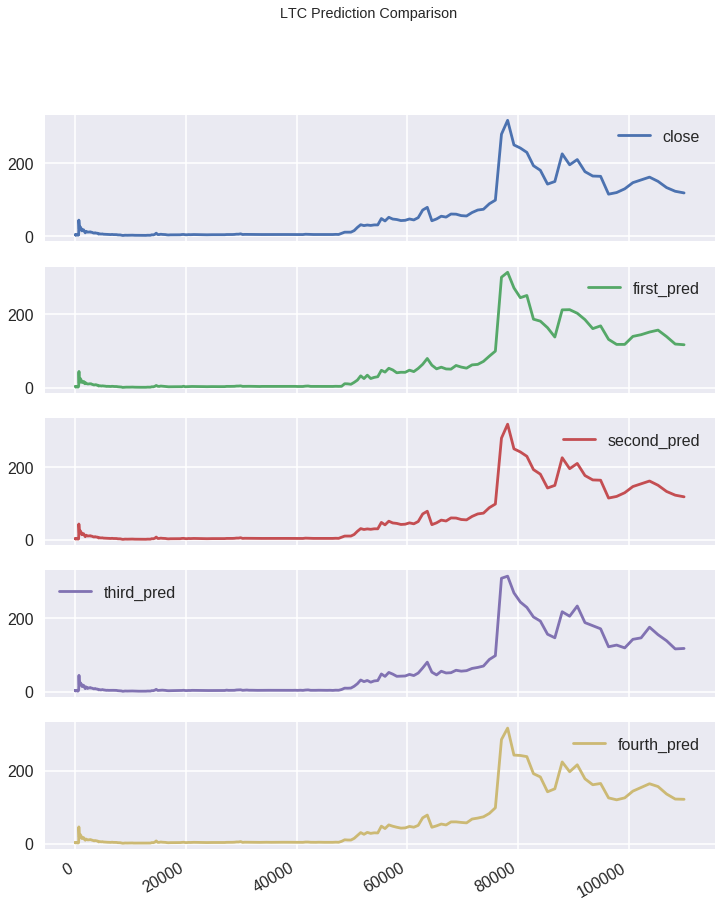

In [132]:
# Creating subplots based on one symbol within the cryptocurrency dataframe
crypto_senti_df.loc[(crypto_senti_df.symbol == 'LTC'), ['close', 'first_pred', 'second_pred', 'third_pred', 'fourth_pred']].plot(subplots=True, figsize=(12, 15), title= 'LTC Prediction Comparison')

Dickey–Fuller test: p=0.943204
      parameters         aic
13  (1, 0, 1, 0) -172.424876
12  (1, 0, 0, 1) -172.298382
25  (2, 0, 1, 0) -170.874914
17  (1, 1, 1, 0) -170.828791
24  (2, 0, 0, 1) -170.567360
                                 Statespace Model Results                                 
Dep. Variable:                           high_box   No. Observations:                   63
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  89.212
Date:                            Mon, 17 Dec 2018   AIC                           -172.425
Time:                                    02:48:53   BIC                           -165.995
Sample:                                04-30-2013   HQIC                          -169.896
                                     - 06-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025 

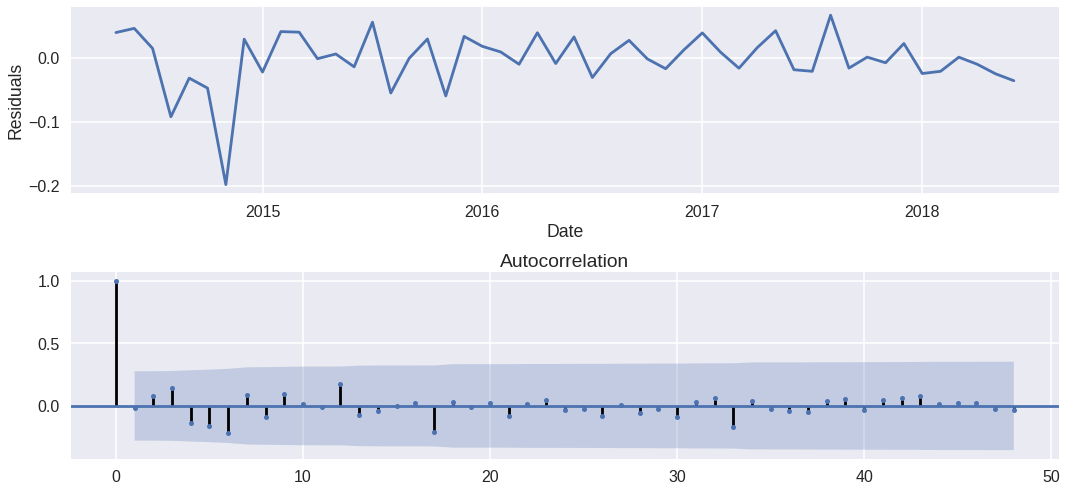

In [152]:
# Extract the BTC data only
# Provide the log returns using the close price in the dataframe and use the value to provide a volatility (rolling standard deviation function). 
# We're using a window of 365 trading days as the cryptocurrency market doesn't open/close. 
BTCcriterion = (crypto_df['symbol'] == 'BTC')
BTCDF=crypto_df[BTCcriterion]
BTCDF['log_ret'] = np.log(BTCDF['close'] / BTCDF['close'].shift(1))
BTCDF['volatility'] = pd.rolling_std(BTCDF['log_ret'], window=365) * np.sqrt(365)
BTCDF['dv'] = (BTCDF['close'] * BTCDF['volume'] / 1e6)[1:]
BTCDF['lret'] = np.log(BTCDF['close'] / BTCDF['close'].shift(1)).dropna() 
BTCDF['daily_illiq'] = np.abs(BTCDF['lret']) / BTCDF['dv']
BTCDF['volatility2'] = BTCDF['log_ret'].rolling(365).std() * np.sqrt(365)

BTCDF.index = BTCDF.Date
BTCDF = BTCDF.resample('D').mean() # Resampling to daily frequency for BTC
BTCDF_month = BTCDF.resample('M').mean() # Resampling to monthly frequency for BTC

# Box-Cox Transformations
BTCDF_month['high_box'], lmbda = stats.boxcox(BTCDF_month.high)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(BTCDF_month.high)[1])

# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection for BTC
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(BTCDF_month.high_box, order=(param[0], d, param[1]),
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())


# Analysis of residues (STL-decomposition)
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])
plt.tight_layout()
plt.show()





In [0]:
# Creating a function for the Inverse Box-Cox Transformation
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

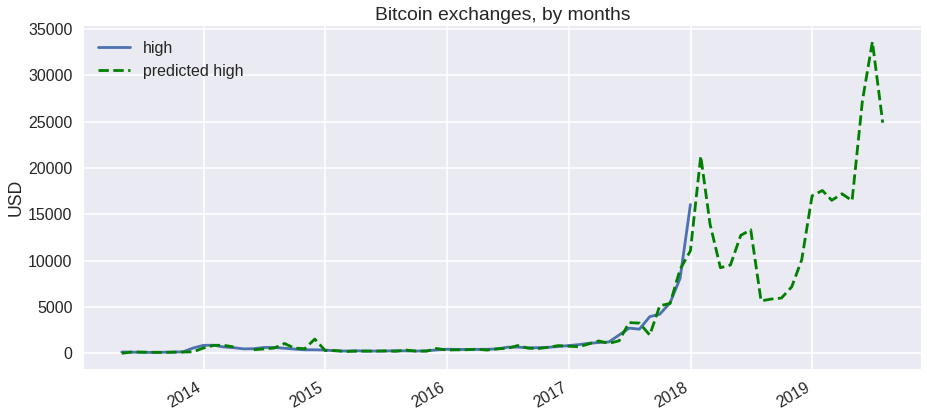

In [154]:
# Creating the Prediction for BTC
BTCDF_month2 = BTCDF_month[['high']]

#Create a range of dates from 1 year prior to today to 1 year in the future
date = pd.date_range(pd.datetime.today() + timedelta(-365), periods=730).date

#Select only the last date of each month
last_dates = [datetime(date.year,
                       date.month,
                       calendar.monthrange(date.year, date.month)[1]) for date in date]

#Create a list of unique last month dates
date_list = list(set(last_dates))

future = pd.DataFrame(index=date_list, columns= BTCDF_month.columns)
BTCDF_month2 = pd.concat([BTCDF_month2, future])
BTCDF_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
BTCDF_month2.high.plot()
BTCDF_month2.forecast.plot(color='g', ls='--', label='predicted high')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('USD')
plt.show()


In [0]:
# Extract the XRP data only and perform calculations
XRPcriterion = (crypto_df['symbol'] == 'XRP')
XRPDF=crypto_df[XRPcriterion]
XRPDF['log_ret'] = np.log(XRPDF['close'] / XRPDF['close'].shift(1))
XRPDF['volatility'] = pd.rolling_std(XRPDF['log_ret'], window=365) * np.sqrt(365)
XRPDF['dv'] = (XRPDF['close'] * XRPDF['volume'] / 1e6)[1:]
XRPDF['lret'] = np.log(XRPDF['close'] / XRPDF['close'].shift(1)).dropna() 
XRPDF['daily_illiq'] = np.abs(XRPDF['lret']) / XRPDF['dv']

XRPDF.index = XRPDF.Date
XRPDF = XRPDF.resample('D').mean() # Resampling to daily frequency for XRP
XRPDF_month = XRPDF.resample('M').mean() # Resampling to monthly frequency for XRP

In [156]:
# Box-Cox Transformations for XRPDF
XRPDF_month['high_box'], lmbda = stats.boxcox(XRPDF_month.high)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(XRPDF_month.high)[1])

Dickey–Fuller test: p=0.735299


In [0]:
# Model Selection for XRP
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(XRPDF_month.high_box, order=(param[0], d, param[1]),
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [158]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
3   (0, 1, 1, 0)  281.135804
9   (1, 0, 1, 0)  281.628558
21  (2, 1, 1, 0)  282.476878
18  (2, 0, 1, 0)  282.564680
4   (0, 1, 2, 0)  282.826466
                                 Statespace Model Results                                 
Dep. Variable:                           high_box   No. Observations:                   59
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -137.568
Date:                            Mon, 17 Dec 2018   AIC                            281.136
Time:                                    02:49:09   BIC                            287.368
Sample:                                08-31-2013   HQIC                           283.569
                                     - 06-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

ValueError: ignored

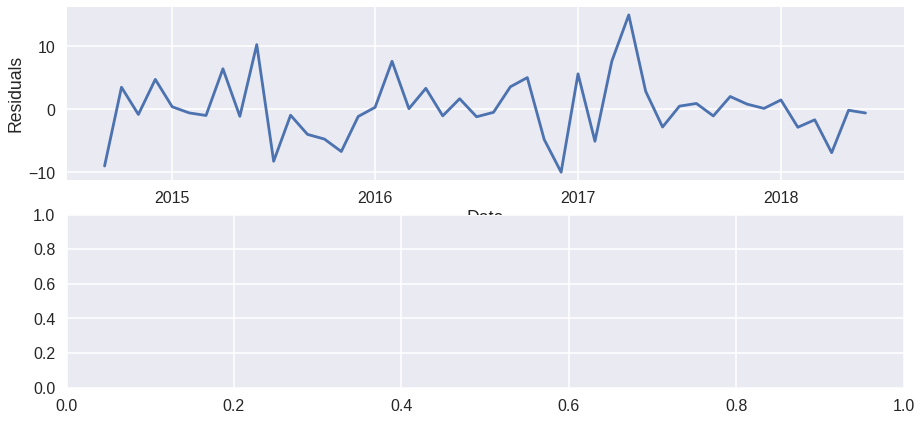

In [159]:
# Analysis of residues
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])
plt.tight_layout()
plt.show()

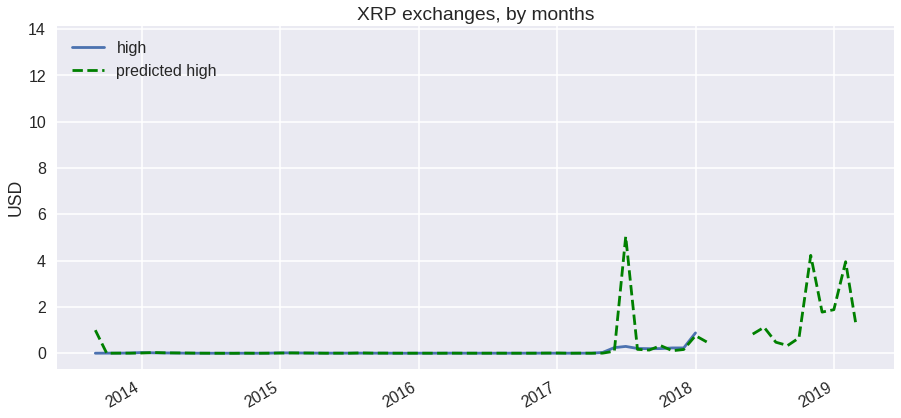

In [160]:
# Creating the Prediction for XRP
XRPDF_month2 = XRPDF_month[['high']]
future = pd.DataFrame(index=date_list, columns= XRPDF_month.columns)
XRPDF_month2 = pd.concat([XRPDF_month2, future])
XRPDF_month2['forecast'] = invboxcox(best_model.predict(start=0, end=1000), lmbda)
plt.figure(figsize=(15,7))
XRPDF_month2.high.plot()
XRPDF_month2.forecast.plot(color='g', ls='--', label='predicted high')
plt.legend()
plt.title('XRP exchanges, by months')
plt.ylabel('USD')
plt.show()

In [0]:
# Extract the LTC data only
LTCcriterion = (crypto_df['symbol'] == 'LTC')
LTCDF=crypto_df[LTCcriterion]
LTCDF['log_ret'] = np.log(LTCDF['close'] / LTCDF['close'].shift(1))
LTCDF['volatility'] = pd.rolling_std(LTCDF['log_ret'], window=365) * np.sqrt(365)
LTCDF['dv'] = (LTCDF['close'] * LTCDF['volume'] / 1e6)[1:]
LTCDF['lret'] = np.log(LTCDF['close'] / LTCDF['close'].shift(1)).dropna() 
LTCDF['daily_illiq'] = np.abs(LTCDF['lret']) / LTCDF['dv']
LTCDF.index = LTCDF.Date
LTCDF = LTCDF.resample('D').mean() # Resampling to daily frequency for LTC
LTCDF_month = LTCDF.resample('M').mean() # Resampling to monthly frequency for LTC

In [162]:
# Box-Cox Transformations for XRPDF
LTCDF_month['high_box'], lmbda = stats.boxcox(LTCDF_month.high)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(LTCDF_month.high)[1])

Dickey–Fuller test: p=0.755176


In [163]:
# Model Selection for LTC
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(LTCDF_month.high_box, order=(param[0], d, param[1]),
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters        aic
6   (0, 1, 0, 1) -22.001625
18  (1, 0, 0, 1) -21.342680
7   (0, 1, 1, 0) -20.270851
8   (0, 1, 1, 1) -20.096903
12  (0, 2, 0, 1) -20.016003
                                 Statespace Model Results                                 
Dep. Variable:                           high_box   No. Observations:                   63
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  14.001
Date:                            Mon, 17 Dec 2018   AIC                            -22.002
Time:                                    02:57:03   BIC                            -15.572
Sample:                                04-30-2013   HQIC                           -19.473
                                     - 06-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

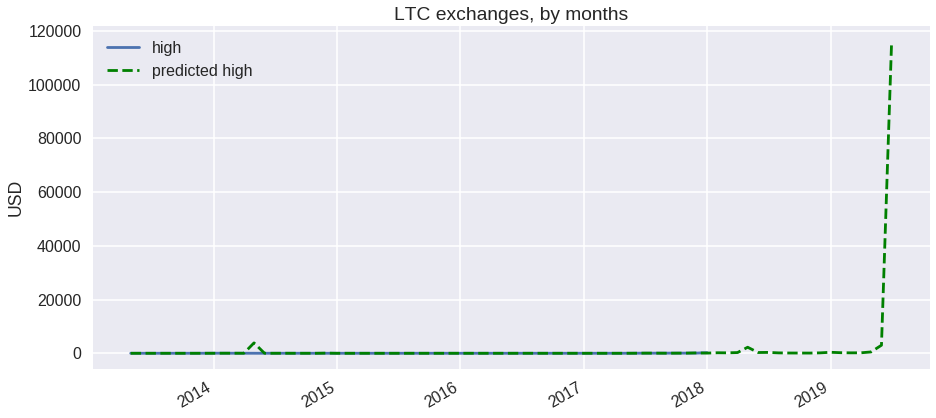

In [164]:
# Creating the Prediction for LTC
LTCDF_month2 = LTCDF_month[['high']]
future = pd.DataFrame(index=date_list, columns= LTCDF_month.columns)
LTCDF_month2 = pd.concat([LTCDF_month2, future])
LTCDF_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
LTCDF_month2.high.plot()
LTCDF_month2.forecast.plot(color='g', ls='--', label='predicted high')
plt.legend()
plt.title('LTC exchanges, by months')
plt.ylabel('USD')
plt.show()

In [170]:
# Extract the ETH data only
ETHcriterion = (crypto_df['symbol'] == 'ETH')
ETHDF=crypto_df[ETHcriterion]
ETHDF['log_ret'] = np.log(ETHDF['close'] / ETHDF['close'].shift(1))
ETHDF['volatility'] = pd.rolling_std(ETHDF['log_ret'], window=365) * np.sqrt(365)
ETHDF['dv'] = (ETHDF['close'] * ETHDF['volume'] / 1e6)[1:]
ETHDF['lret'] = np.log(ETHDF['close'] / ETHDF['close'].shift(1)).dropna() 
ETHDF['daily_illiq'] = np.abs(ETHDF['lret']) / ETHDF['dv']
ETHDF.index = ETHDF.Date
ETHDF = ETHDF.resample('D').mean() # Resampling to daily frequency for ETH
ETHDF_month = ETHDF.resample('M').mean() # Resampling to monthly frequency for ETH

# Box-Cox Transformations for ETHDF
ETHDF_month['high_box'], lmbda = stats.boxcox(ETHDF_month.high)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(ETHDF_month.high)[1])

Dickey–Fuller test: p=0.997940


In [171]:
# Model Selection for ETH
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(ETHDF_month.high_box, order=(param[0], d, param[1]),
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters        aic
5   (1, 0, 0, 0)  38.370495
2   (0, 1, 1, 0)  38.708084
1   (0, 1, 0, 0)  38.821562
6   (1, 0, 1, 0)  39.478718
11  (2, 0, 0, 0)  40.011545
                                 Statespace Model Results                                 
Dep. Variable:                           high_box   No. Observations:                   35
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -17.185
Date:                            Mon, 17 Dec 2018   AIC                             38.370
Time:                                    03:01:17   BIC                             41.481
Sample:                                08-31-2015   HQIC                            39.444
                                     - 06-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

ValueError: ignored

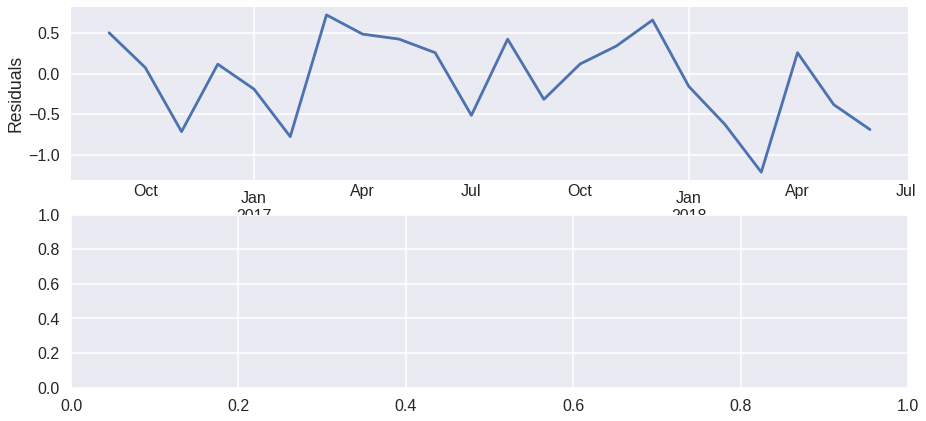

In [167]:
# Analysis of residues for ETH
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])
plt.tight_layout()
plt.show()


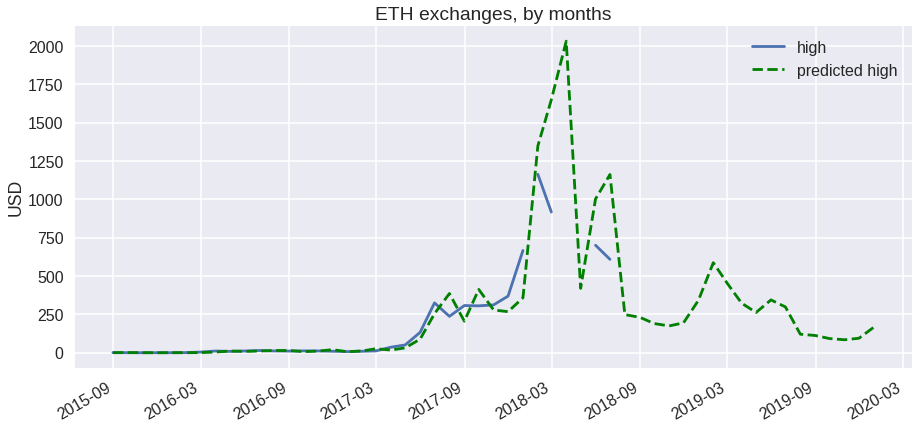

In [173]:
# Creating the Prediction for ETH
ETHDF_month2 = ETHDF_month[['high']]
future = pd.DataFrame(index=date_list, columns= ETHDF_month.columns)
ETHDF_month2 = pd.concat([ETHDF_month2, future])
ETHDF_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
ETHDF_month2.high.plot()
ETHDF_month2.forecast.plot(color='g', ls='--', label='predicted high')
plt.legend()
plt.title('ETH exchanges, by months')
plt.ylabel('USD')
plt.show()